# Аналитика данных благотворительного фонда "АиФ. Доброе сердце"

Благотворительный фонд "АиФ. Доброе сердце" был создан в 2005 году по инициативе еженедельной газеты "Аргументы и факты". За эти годы более 10 тысяч подопечных со сложными диагнозами получили помощь в оплате операций, лекарств и медоборудования. Фонд "АиФ Доброе сердце" хочет лучше узнать своих благотворителей, чтобы максимально эффективно выстроить работу с ними.

**Цель исследования:**
1. Сегменты пользователей: RFM-анализ, описание сегментов, таблица с id благотворителя и его сегментом;
2. Когортный анализ;
3. Анализ эффективности каналов привлечения пользователей;      
4. Расчет основных маркетинговых и продуктовых метрик.

**В нашем распоряжении:**
- Данные о действиях пользователей;
- Данные о платежах пользователей.

**Исследование пройдет в 6 шагов:**

**1 Шаг. [Загрузка и предобработка данных](#one)**        
   1.1 [Загрузить и изучить данные из файла в датафрейм.](#one1)  
   1.2 [Пропущенные значения в столбцах](#one2)  
   1.3 [Типы данных в каждом столбце](#one3)  
   1.4 [Явные и неявные дубликаты](#one4)   


**2 Шаг. [Исследовательский анализ данных](#two)**      
   2.1 [Определение периода данных.](#two1)   
   2.2 [Положительные и отрицательные транзакции (paid, notpaid, fail).](#two2)     
   2.3 [Минимальная, максимальная, средняя, медиана пожертвования. Аномальные значения.](#two3)  

**3 Шаг. [Продуктовые метрики: DAU, WAU, MAU](#three)**      

**4 Шаг. [Коммерческие метрики](#four)**     
   4.1 [Средний чек](#four1)   
   4.2 [Когортный анализ пользователей](#four2)    
   4.3 [В какой день недели чаще приходят пожертвования](#four3)     
   4.4 [В какое время суток чаще приходят пожертвования](#four4)    
   4.5 [RFM анализ: сегменты, статистика по сегментам, поведение по сегментам.](#four5)      
   4.6 [Топы по пожертвованиям](#four6)       

**5 Шаг. [Маркетинговые метрики](#five)**    
   5.1 [Анализ каналов привлечения.Главный источник входа (первый) для пользователей](#five1)     
   5.2 [Акции, которые привлекли максимально пользователей.](#five2)      
   5.3 [Анализ Email рассылок.](#five3) 

**6 Шаг. [Общий вывод](#six)**  
      


# <a id="one"></a> **1 шаг.** Загрузка и предобработка данных     

## <a id="one1"></a> 1.1 Загрузить и изучить данные из файла в датафрейм.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import numpy as np
from datetime import timedelta

In [2]:
files = ['dobroaif_one.csv', 'dobroaif_two.csv', 'dobroaif_three.csv']
table= []

In [3]:
new_cols = [
    'action_id', 'user_action', 'datetime', 'channel_id', 'channel_name',
    'сampaign', 'source', 'user_id', 'mailing_action', 'mailing_name',
    'not_sent_reason_name', 'not_delivered_reason_name'
]

In [4]:
for file in files:
    df = pd.read_csv(file, encoding='utf8', sep=';', usecols=[0, 2, 4, 6, 7, 10, 11, 17, 21, 22, 28, 30], low_memory=False)
    old_cols = df.columns.tolist()
    cols_dict = {k: v for k, v in zip(old_cols, new_cols)}
    df = df.rename(columns=cols_dict) 
    table.append(df)


In [5]:
action= pd.concat(table)
action.head()

,action_id,user_action,datetime,channel_id,channel_name,сampaign,source,user_id,mailing_action,mailing_name,not_sent_reason_name,not_delivered_reason_name
0,2734,Импорт при переносе исторической базы клиентов,2022-03-19 21:30:59,9,Сайт,NaN,NaN,2734,NaN,NaN,NaN,NaN
1,80475,Оплата заказа,2022-04-18 15:48:35,1,Административный сайт Mindbox,NaN,NaN,2734,NaN,NaN,NaN,NaN
2,101792,Оплата заказа,2022-04-18 15:49:50,1,Административный сайт Mindbox,NaN,NaN,2734,NaN,NaN,NaN,NaN
3,632765,Изменение часового пояса клиентов при изменени...,2022-11-23 08:40:16,9,Сайт,NaN,NaN,2734,NaN,NaN,NaN,NaN
4,632766,Переход на сайт,2022-11-23 08:40:16,1729,utm_term Не указан,ignatij-ovchinnikov,vk,2734,NaN,NaN,NaN,NaN


`action`- данные о действиях пользователей.       

Описание данных:    
- `action_id`-Идентификатор действия пользователя,         
- `user_action`- Имя действия пользователя,    
- `datetime`-Дата и время создания действия пользователя ,    
- `channel_id`-Идентификатор канала привлечения,     
- `channel_name`- Имя канала привлечения пользователя,    
- `сampaign`-Название рекламной кампании,         
- `source`-Ресурс, на котором проводится рекламная кампания,       
- `user_id-`Идентификатор пользователя (mindbox),        
- `mailing_action`-Статус отправки рассылки,      
- `mailing_name`-Название акции в рассылке,            
- `not_sent_reason_name`-Название причины неотправки рассылки,           
- `not_delivered_reason_name`-Название причины недоставки рассылки.     

In [6]:
files_2 = ['orders.csv']
table_2= []

In [7]:
new_cols_2 = [
    'order_id', 'datetime', 'channel_id', 'channel_name',
    'order_price', 'recurrent', 'product_name',
    'paid', 'order_status', 'user_id'
]

In [8]:
for file_2 in files_2:
    df_2 = pd.read_csv(file_2, encoding='cp1251', sep=';', usecols=[0, 2, 3, 5, 9, 14, 17, 21, 20, 30]) 
    old_cols_2 = df_2.columns.tolist()
    cols_dict_2 = {t: d for t, d in zip(old_cols_2, new_cols_2)}
    df_2 = df_2.rename(columns=cols_dict_2) 
    table_2.append(df_2)


In [9]:
orders= pd.concat(table_2)
orders.head()

,order_id,datetime,channel_id,channel_name,order_price,recurrent,product_name,paid,order_status,user_id
0,37117,14.10.2021 15:50,1,Административный сайт Mindbox,1,NaN,На уставную деятельность,1,Paid,2734
1,58434,18.03.2021 10:52,1,Административный сайт Mindbox,50,NaN,На уставную деятельность,50,Paid,2734
2,102699,23.11.2022 8:42,9,Сайт,100,False,Пожертвование Благотворительный фонд «АиФ. Доб...,100,notpaid,2734
3,111808,29.03.2023 15:15,9,Сайт,300,False,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847
4,67535,16.06.2021 23:10,1,Административный сайт Mindbox,200,NaN,На уставную деятельность,200,Paid,2847


orders- данные о платежах пользователей.       

Описание данных:    
- `order_id`-Идентификатор платежа,          
- `datetime`-Дата и Время первого действия,       
- `channel_id`- Идентификатор канала привлечения первого действия,       
- `channel_name`-Внешний идентификатор канала привлечения первого действия,       
- `order_price`-Итоговая стоимость заказа,       
- `recurrent`-Поле заказа повтор,  
- `product_name`- название продукта,   
- `paid`-Поле цена линии,       
- `order_status`-Идентификатор статуса заказа (внешний),       
- `user_id`-Идентификатор пользователя mindbox (для связи таблиц)

       

## <a id="one2"></a> 1.2 Пропущенные значения в столбцах.

In [10]:
action.isna().sum()

action_id                          0
user_action                        0
datetime                           0
channel_id                         0
channel_name                       0
сampaign                     2072900
source                       2072900
user_id                            0
mailing_action                500469
mailing_name                  500469
not_sent_reason_name         2101353
not_delivered_reason_name    2102044
dtype: int64

In [11]:
orders.isna().sum()

order_id            0
datetime            0
channel_id          0
channel_name        0
order_price         0
recurrent       12472
product_name      200
paid                0
order_status        0
user_id             0
dtype: int64

In [12]:
columns_to_fill = ['сampaign', 'source', 'mailing_action', 'mailing_name', 'not_sent_reason_name', 'not_delivered_reason_name']
action[columns_to_fill] = action[columns_to_fill].fillna('not_info')
action.head(5)

,action_id,user_action,datetime,channel_id,channel_name,сampaign,source,user_id,mailing_action,mailing_name,not_sent_reason_name,not_delivered_reason_name
0,2734,Импорт при переносе исторической базы клиентов,2022-03-19 21:30:59,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info
1,80475,Оплата заказа,2022-04-18 15:48:35,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info
2,101792,Оплата заказа,2022-04-18 15:49:50,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info
3,632765,Изменение часового пояса клиентов при изменени...,2022-11-23 08:40:16,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info
4,632766,Переход на сайт,2022-11-23 08:40:16,1729,utm_term Не указан,ignatij-ovchinnikov,vk,2734,not_info,not_info,not_info,not_info


In [13]:
orders['recurrent'] = orders['recurrent'].fillna(False).astype(bool)
orders['product_name'] = orders['product_name'].fillna('not_info')
orders.head(5)

,order_id,datetime,channel_id,channel_name,order_price,recurrent,product_name,paid,order_status,user_id
0,37117,14.10.2021 15:50,1,Административный сайт Mindbox,1,False,На уставную деятельность,1,Paid,2734
1,58434,18.03.2021 10:52,1,Административный сайт Mindbox,50,False,На уставную деятельность,50,Paid,2734
2,102699,23.11.2022 8:42,9,Сайт,100,False,Пожертвование Благотворительный фонд «АиФ. Доб...,100,notpaid,2734
3,111808,29.03.2023 15:15,9,Сайт,300,False,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847
4,67535,16.06.2021 23:10,1,Административный сайт Mindbox,200,False,На уставную деятельность,200,Paid,2847


In [14]:
action.isna().sum()

action_id                    0
user_action                  0
datetime                     0
channel_id                   0
channel_name                 0
сampaign                     0
source                       0
user_id                      0
mailing_action               0
mailing_name                 0
not_sent_reason_name         0
not_delivered_reason_name    0
dtype: int64

In [15]:
orders.isna().sum()

order_id        0
datetime        0
channel_id      0
channel_name    0
order_price     0
recurrent       0
product_name    0
paid            0
order_status    0
user_id         0
dtype: int64

Мы не могли заполнить пропуски, поэтому заменили `Nan` на `not_info`.    
В столбце `orders['recurrent']` сразу заменили пропуски на False и поменяли тип данных на bool


## <a id="one3"></a> 1.3 Типы данных в каждом столбце

In [16]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109586 entries, 0 to 115607
Data columns (total 12 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   action_id                  int64 
 1   user_action                object
 2   datetime                   object
 3   channel_id                 int64 
 4   channel_name               object
 5   сampaign                   object
 6   source                     object
 7   user_id                    int64 
 8   mailing_action             object
 9   mailing_name               object
 10  not_sent_reason_name       object
 11  not_delivered_reason_name  object
dtypes: int64(3), object(9)
memory usage: 209.2+ MB


In [17]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54445 entries, 0 to 54444
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      54445 non-null  int64 
 1   datetime      54445 non-null  object
 2   channel_id    54445 non-null  int64 
 3   channel_name  54445 non-null  object
 4   order_price   54445 non-null  int64 
 5   recurrent     54445 non-null  bool  
 6   product_name  54445 non-null  object
 7   paid          54445 non-null  int64 
 8   order_status  54445 non-null  object
 9   user_id       54445 non-null  int64 
dtypes: bool(1), int64(5), object(4)
memory usage: 3.8+ MB


Поменяем в `action`:     
   - `datetime` тип object на date  

Поменяем в `orders`:   
   - `datetime` тип object на date   


In [18]:
action['datetime'] = pd.to_datetime(action['datetime'], format='%Y-%m-%dT%H:%M')
orders['datetime'] = pd.to_datetime(orders['datetime'], format='%d.%m.%Y %H:%M')

In [19]:
action.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109586 entries, 0 to 115607
Data columns (total 12 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   action_id                  int64         
 1   user_action                object        
 2   datetime                   datetime64[ns]
 3   channel_id                 int64         
 4   channel_name               object        
 5   сampaign                   object        
 6   source                     object        
 7   user_id                    int64         
 8   mailing_action             object        
 9   mailing_name               object        
 10  not_sent_reason_name       object        
 11  not_delivered_reason_name  object        
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 209.2+ MB


In [20]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54445 entries, 0 to 54444
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      54445 non-null  int64         
 1   datetime      54445 non-null  datetime64[ns]
 2   channel_id    54445 non-null  int64         
 3   channel_name  54445 non-null  object        
 4   order_price   54445 non-null  int64         
 5   recurrent     54445 non-null  bool          
 6   product_name  54445 non-null  object        
 7   paid          54445 non-null  int64         
 8   order_status  54445 non-null  object        
 9   user_id       54445 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(5), object(3)
memory usage: 3.8+ MB


## <a id="one4"></a> 1.4 Явные и неявные дубликаты

In [21]:
# таблица action
# проверяем дубликаты
print('Количество дубликатов в таблице action: ',action.duplicated().sum())

Количество дубликатов в таблице action:  0


In [22]:
# таблица orders
# проверяем дубликаты
print('Количество дубликатов в таблице orders: ',orders.duplicated().sum())

Количество дубликатов в таблице orders:  0


In [23]:
print('Таблица action:')
print('Количество уникальных значений в имени действия пользователя',len(action['user_action'].unique()))
print('Количество уникальных значений в имени канала привлечения пользователя',len(action['channel_name'].unique()))
print('Таблица orders:')
print('Количество уникальных значений в имени действия пользователя',len(orders['channel_name'].unique()))

Таблица action:
Количество уникальных значений в имени действия пользователя 1138
Количество уникальных значений в имени канала привлечения пользователя 223
Таблица orders:
Количество уникальных значений в имени действия пользователя 2


In [24]:
action['user_action'].unique()

array(['Импорт при переносе исторической базы клиентов', 'Оплата заказа',
       'Изменение часового пояса клиентов при изменении региона', ...,
       'Копия Спасибо за ежемесячные пожертвование (повторные) Запрос отписки',
       'Новости Байсаева Запрос отписки',
       'Новости Байсаева Не доставлено'], dtype=object)

In [25]:
action['channel_name'].unique()

array(['Сайт', 'Административный сайт Mindbox', 'utm_term Не указан',
       'Email', 'Прямой переход', 'nikolaeva', 'google.com',
       'b24portal.dobroe-aif.ru', 'borisbot.com', 'yandex.ru',
       'ostrovaru.com', 'help.yandex.ru', 'org.telegram.messenger',
       'razovie', 'video2', 'solovyova', 'instagram.com', 'rec',
       'recurrent', 'report', 'yoomoney.ru', 'com.google.android.gm',
       'vk.com', 'm.sport.yandex.ru', 'fullscreen', 'mail.rambler.ru',
       'first-stage', 'm.images.yandex.ru', 'WebPush',
       'xn--80afcdbalict6afooklqi5o.xn--p1ai', 'link.2gis.com',
       'images.yandex.ru', 'taplink.cc', 'taplink', 'm.video.yandex.ru',
       'click.mail.ru', 'google.it', 'm.mail.yandex.ru', 'ost', 'halilov',
       'done', 'banner', 'orders.cloudpayments.ru', 'story', 'google.ru',
       'dzen.ru', 'tapkink', 'mazgorec', 'm.news.yandex.ru', 'vse',
       'ru.yandex.searchplugin', 'com.yandex.browser', 'ru.yandex.metro',
       'video', 'interscroller', 'm.pogoda.yandex

In [26]:
orders['channel_name'].unique()

array(['Административный сайт Mindbox', 'Сайт'], dtype=object)

Явных и неявных дубликатов не обнаружено.

**Вывод 1 шаг. Загрузка и предобработка данных**

1. Таблица `action`- данные о действиях пользователей.       

Описание данных:    
- `action_id`-Идентификатор действия пользователя,         
- `user_action`- Имя действия пользователя,    
- `datetime`-Дата и время создания действия пользователя ,    
- `channel_id`-Идентификатор канала привлечения,     
- `channel_name`- Имя канала привлечения пользователя,    
- `сampaign`-Название рекламной кампании,         
- `source`-Ресурс, на котором проводится рекламная кампания,       
- `user_id-`Идентификатор пользователя (mindbox),        
- `mailing_action`-Статус отправки рассылки,      
- `mailing_name`-Название акции в рассылке,            
- `not_sent_reason_name`-Название причины неотправки рассылки,           
- `not_delivered_reason_name`-Название причины недоставки рассылки.   

Таблица `orders`- данные о платежах пользователей.       

Описание данных:    
- `order_id`-Идентификатор платежа,          
- `datetime`-Дата и Время первого действия,       
- `channel_id`- Идентификатор канала привлечения первого действия,       
- `channel_name`-Внешний идентификатор канала привлечения первого действия,       
- `order_price`-Итоговая стоимость заказа,       
- `recurrent`-Поле заказа повтор,  
- `product_name`- название продукта,   
- `paid`-Поле цена линии,       
- `order_status`-Идентификатор статуса заказа (внешний),       
- `user_id`-Идентификатор пользователя mindbox (для связи таблиц)\

2. В таблице `action` и `orders` присутствуют пропуски. Так как строки с пропусками мы не можем удалить или заменить, мы вместо `Nan` поставили `not_info`. В столбце `orders['recurrent']`  заменили пропуски на False и поменяли тип данных на bool

3. В обоих таблицах `action` и `orders` столбец `datetime` из типа object поменяли на date.

4. Явных и неявных дубликатов не обнаружено.

# <a id="two"></a> **2 шаг.** Исследовательский анализ данных

## <a id="two1"></a> 2.1 Определение периода данных.

In [27]:
min_date = orders['datetime'].min()
max_date = orders['datetime'].max()
time_delta = np.max(orders['datetime']) - np.min(orders['datetime'])

print(f"Промежуток времени в таблице orders: {time_delta}")
print(f"Минимальная дата в таблице orders: {min_date}")
print(f"Максимальная дата в таблице orders: {max_date}")

Промежуток времени в таблице orders: 1042 days 13:07:00
Минимальная дата в таблице orders: 2021-01-01 00:00:00
Максимальная дата в таблице orders: 2023-11-09 13:07:00


In [28]:
min_date_action = action['datetime'].min()
max_date_action = action['datetime'].max()
time_delta_2 = np.max(action['datetime']) - np.min(action['datetime'])

print(f"Промежуток времени в таблице action: {time_delta_2}")
print(f"Минимальная дата в таблице action: {min_date_action}")
print(f"Максимальная дата в таблице action: {max_date_action}")

Промежуток времени в таблице action: 597 days 14:25:58
Минимальная дата в таблице action: 2022-03-19 21:30:59
Максимальная дата в таблице action: 2023-11-07 11:56:57


## <a id="two2"></a> 2.2 Положительные и отрицательные транзакции (paid, notpaid, fail)

In [29]:
print(f"Количество пройденных и не пройденных платежей: {orders['order_id'].count()}")
print(f"Количество пройденных платежей: {len(orders[orders['order_status'] == 'Paid'])}")
print(f"Количество платежей notpaid : {len(orders[orders['order_status'] == 'notpaid'])}")
print(f"Количество платежей fail : {len(orders[orders['order_status'] == 'fail'])}")

Количество пройденных и не пройденных платежей: 54445
Количество пройденных платежей: 41079
Количество платежей notpaid : 8662
Количество платежей fail : 4704


In [30]:
orders['order_status'].unique()

array(['Paid', 'notpaid', 'fail'], dtype=object)

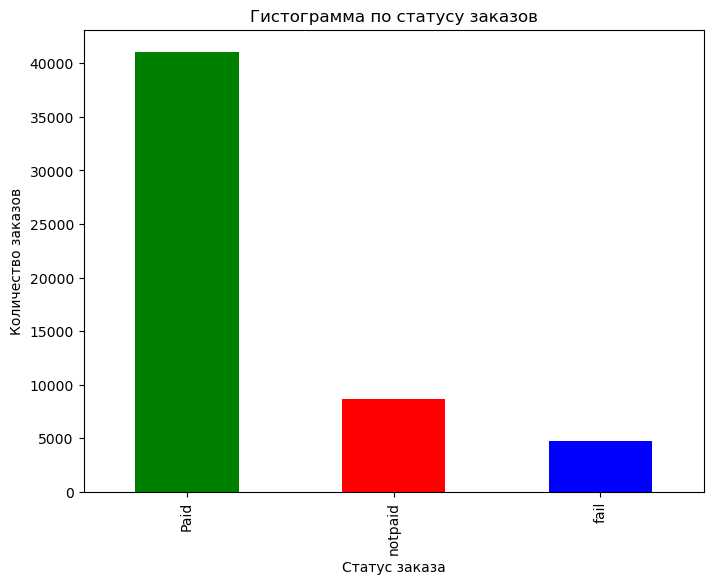

In [31]:

plt.figure(figsize=(8, 6))
orders['order_status'].value_counts().plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Гистограмма по статусу заказов')
plt.xlabel('Статус заказа')
plt.ylabel('Количество заказов')
plt.show()

In [32]:
print(f"Общая сумма пожертвований с пройденными и не пройденными платежами: {orders['paid'].sum()}")
print(f"Общая сумма пожертвований с пройденными платежами: {orders[orders['order_status'] == 'Paid']['paid'].sum()}")
print(f"Общая сумма пожертвований с notpaid : {orders[orders['order_status'] == 'notpaid']['paid'].sum()}")
print(f"Общая сумма пожертвований с fail : {orders[orders['order_status'] == 'fail']['paid'].sum()}")

Общая сумма пожертвований с пройденными и не пройденными платежами: 58764113
Общая сумма пожертвований с пройденными платежами: 31259091
Общая сумма пожертвований с notpaid : 24255157
Общая сумма пожертвований с fail : 3249865


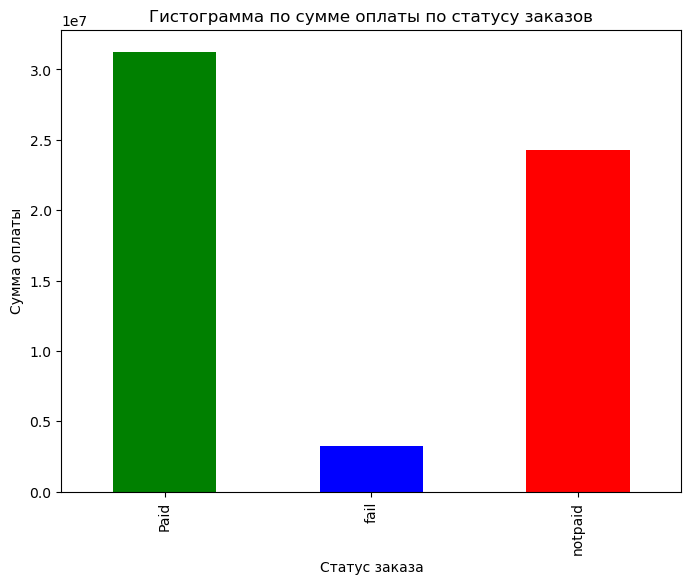

In [33]:
plt.figure(figsize=(8, 6))
orders.groupby('order_status')['paid'].sum().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Гистограмма по сумме оплаты по статусу заказов')
plt.xlabel('Статус заказа')
plt.ylabel('Сумма оплаты')
plt.show()

In [34]:
# Проверим, есть клиенты или нет, которые так и не совершили оплату на сайте
orders['order_status'] = orders['order_status'].replace('notpaid', 'fail')
payment_table = pd.pivot_table(orders, index='user_id', columns='order_status', aggfunc='size', fill_value=0)

payment_table.columns = ['Удачные оплаты', 'Неудачные оплаты']

payment_table.sort_values(by='Неудачные оплаты', ascending=False).head(10).style.set_caption('Таблица оплат')

,Удачные оплаты,Неудачные оплаты
user_id,,
26371,0,334
16770,61,98
18934,6,88
34680,25,80
18935,7,66
28485,11,64
20912,23,50
36966,0,49
32088,6,48


In [35]:
filtered_table = payment_table.loc[(payment_table['Удачные оплаты'] == 0) & (payment_table['Неудачные оплаты'] >= 1)]
filtered_table.sort_values(by='Неудачные оплаты', ascending=False).head(10).style.set_caption('Удачных оплат нет, только неудачные')

,Удачные оплаты,Неудачные оплаты
user_id,,
26371,0,334
36966,0,49
31447,0,36
31921,0,32
40790,0,26
41098,0,20
40612,0,18
27964,0,18
31565,0,15


In [36]:
print("Количество уникальных клиентов, совершавшие транзакцию:",  len(payment_table))
filtered_table_2 = payment_table.loc[(payment_table['Удачные оплаты'] >= 1) & (payment_table['Неудачные оплаты'] >= 1)]
print("Количество уникальных клиентов, которые совершили и удачные, и неудачные оплаты:", len(filtered_table_2))
print("Количество уникальных клиентов, совершивших неудачные оплаты и ни одной удачной:", len(filtered_table))


Количество уникальных клиентов, совершавшие транзакцию: 17339
Количество уникальных клиентов, которые совершили и удачные и не удачные оплаты: 3733
Количество уникальных клиентов, совершившие неудачные оплаты и ни одной удачной: 1957


In [37]:
orders[orders['user_id'] == 26371]

,order_id,datetime,channel_id,channel_name,order_price,recurrent,product_name,paid,order_status,user_id
25629,109598,2023-02-13 19:21:00,9,Сайт,183152,False,Пожертвование Благотворительный фонд «АиФ. Доб...,183152,fail,26371
25630,109599,2023-02-13 19:29:00,9,Сайт,197287,False,Пожертвование Благотворительный фонд «АиФ. Доб...,197287,fail,26371
25631,109600,2023-02-13 19:38:00,9,Сайт,327766,False,Пожертвование Благотворительный фонд «АиФ. Доб...,327766,fail,26371
25632,109758,2023-02-16 16:28:00,9,Сайт,30,False,Пожертвование Благотворительный фонд «АиФ. Доб...,30,fail,26371
25633,109759,2023-02-16 16:31:00,9,Сайт,30,False,Пожертвование Благотворительный фонд «АиФ. Доб...,30,fail,26371
...,...,...,...,...,...,...,...,...,...,...
25958,81701,2022-04-26 11:02:00,9,Сайт,42982,False,Пожертвование Благотворительный фонд «АиФ. Доб...,42982,fail,26371
25959,81669,2022-04-26 08:53:00,9,Сайт,111550,False,Пожертвование Благотворительный фонд «АиФ. Доб...,111550,fail,26371
25960,81670,2022-04-26 08:53:00,9,Сайт,500,False,Пожертвование Благотворительный фонд «АиФ. Доб...,500,fail,26371
25961,81590,2022-04-25 09:27:00,9,Сайт,500,False,Пожертвование Благотворительный фонд «АиФ. Доб...,500,fail,26371


1957 клиентов пришли на сайт совершить оплату,но так ее не произвели. 3773 клиентов даже после неудач, совершали оплату. Причиной может быть технические сбои, неправильный ввод данных, отсутствие средств на счете, мошенничество, отказ кредитной карты и т.д.            
Для дальнейшего анализа мы выберем только клиентов которые совершили удачную оплату.

In [38]:
orders = orders[orders['order_status'] == 'Paid']
print("Количество клиентов, совершавшие транзакцию после фильтрации данных:", len(orders['user_id'].unique()))
assert len(payment_table) -len(filtered_table)== len(orders['user_id'].unique()) 

Количество клиентов, совершавшие транзакцию после фильтрации данных: 15382


## <a id="two3"></a> 2.3 Минимальная, максимальная, средняя, медиана пожертвования. Аномальные значения. 

Посмотрим отличия столбца `order_price` и `paid`

In [39]:
orders[['order_price','paid']].describe()

,order_price,paid
count,41079.000000,41079.000000
mean,752.548626,760.950632
std,2715.978544,2722.198914
min,0.000000,0.000000
25%,108.000000,150.000000
50%,300.000000,300.000000
75%,500.000000,500.000000
max,200000.000000,200000.000000


In [40]:
print(f"Общая сумма пожертвований столбца `order_price`: {orders['order_price'].sum()}")
print(f"Общая сумма пожертвований столбца `paid`: {orders['paid'].sum()}")
print(f"Разница: {orders['paid'].sum()-orders['order_price'].sum()}")

Общая сумма пожертвований столбца `order_price`: 30913945
Общая сумма пожертвований столбца `paid`: 31259091
Разница: 345146


In [41]:
comparison = orders
comparison['comparison'] = comparison['paid'] == comparison['order_price']

comparison = comparison.loc[comparison['comparison']==False]
print(f"Количество пожертвований : {orders['order_price'].count()}")
print(f"Количество пожертвований где столбец `order_price` и `paid` отличаются: {comparison['comparison'].count()}")
print(f"Количество пожертвований где столбец `order_price` и `paid` отличаются в %: {comparison['comparison'].count() / orders['order_price'].count() * 100:.2f}")

Количество пожертвований : 41079
Количество пожертвований где столбец `order_price` и `paid` отличаются: 417
Количество пожертвований где столбец `order_price` и `paid` отличаются в %: 1.02


Разница в суммах двух столбцах не большая и отличие 2-х столбцов 1,02%.Мы возьмем столбец `paid`.

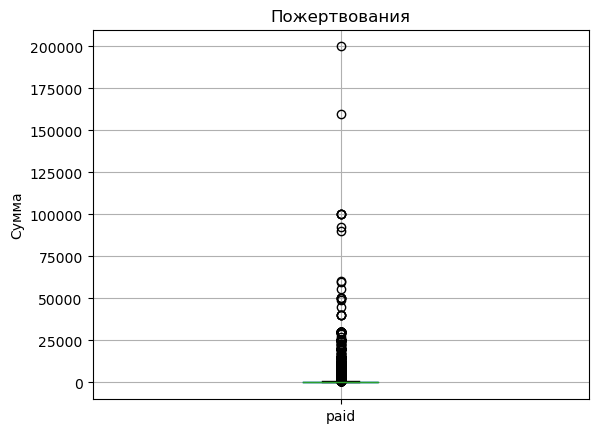

In [42]:
orders.boxplot('paid')
plt.title('Пожертвования')
plt.ylabel("Сумма")
plt.show()

In [43]:
#уберем 0 пожертвования 
orders = orders[(orders['paid'] > 0)]

In [44]:
orders[['paid']].describe()

,paid
count,41010.000000
mean,762.230944
std,2724.308973
min,1.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,200000.000000


In [45]:
orders['month'] = orders['datetime'].dt.to_period('M')
orders

,order_id,datetime,channel_id,channel_name,order_price,recurrent,product_name,paid,order_status,user_id,comparison,month
0,37117,2021-10-14 15:50:00,1,Административный сайт Mindbox,1,False,На уставную деятельность,1,Paid,2734,True,2021-10
1,58434,2021-03-18 10:52:00,1,Административный сайт Mindbox,50,False,На уставную деятельность,50,Paid,2734,True,2021-03
3,111808,2023-03-29 15:15:00,9,Сайт,300,False,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,2847,True,2023-03
4,67535,2021-06-16 23:10:00,1,Административный сайт Mindbox,200,False,На уставную деятельность,200,Paid,2847,True,2021-06
5,72610,2021-09-20 14:29:00,1,Административный сайт Mindbox,25,False,На уставную деятельность,25,Paid,2861,True,2021-09
...,...,...,...,...,...,...,...,...,...,...,...,...
54434,133831,2023-11-09 10:52:00,9,Сайт,50,False,Пожертвование Благотворительный фонд «АиФ. Доб...,50,Paid,42464,True,2023-11
54435,133832,2023-11-09 10:52:00,9,Сайт,20,False,Пожертвование Благотворительный фонд «АиФ. Доб...,20,Paid,42465,True,2023-11
54441,133854,2023-11-09 11:50:00,9,Сайт,500,False,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,42467,True,2023-11
54443,133859,2023-11-09 12:02:00,9,Сайт,100,False,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,42468,True,2023-11


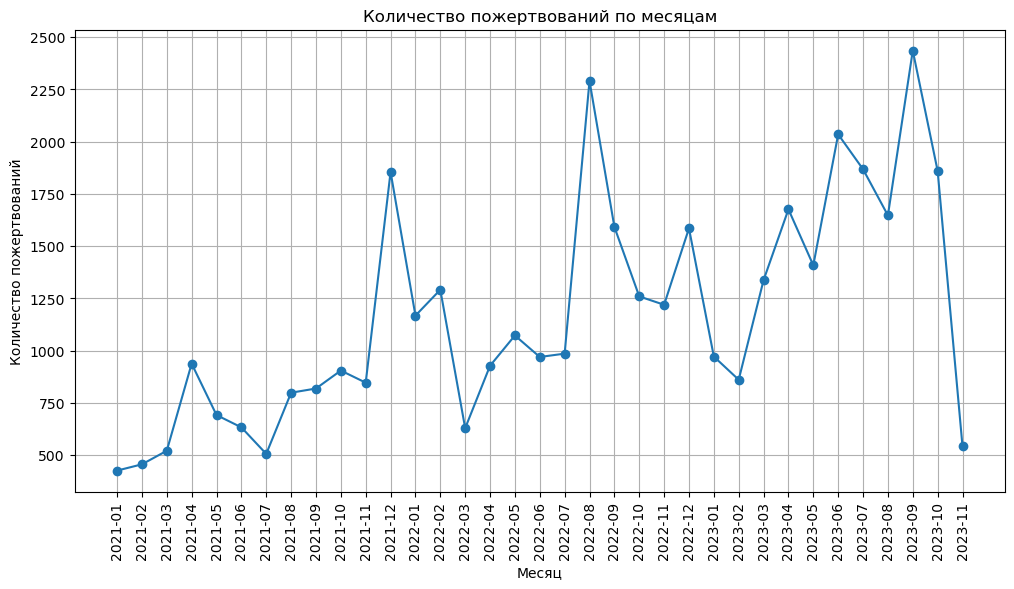

In [46]:
donations_by_month = orders.groupby('month').size()

plt.figure(figsize=(12, 6))
plt.plot(donations_by_month.index.astype(str), donations_by_month.values, marker='o', linestyle='-')
plt.title('Количество пожертвований по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество пожертвований')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()

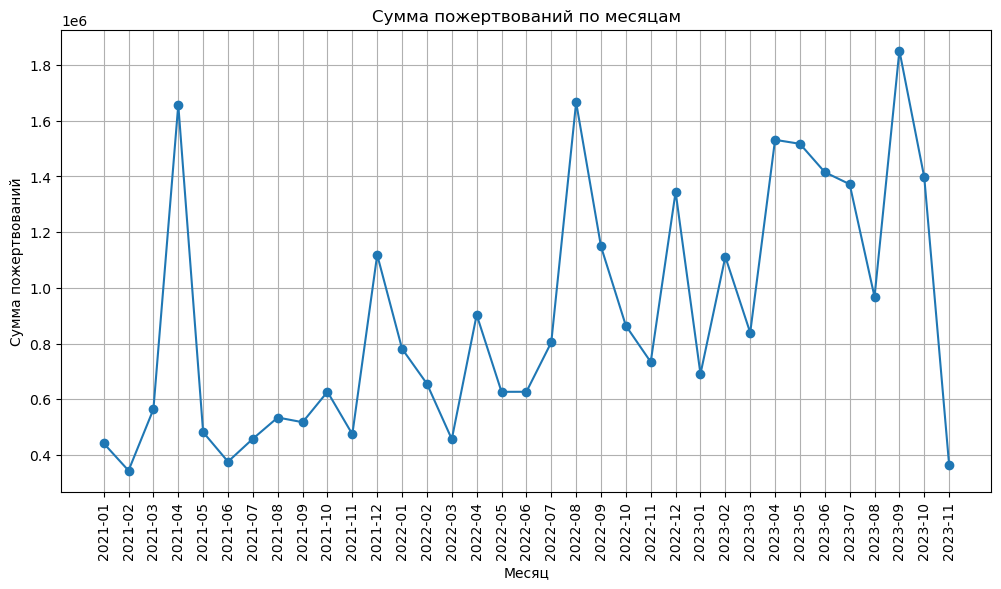

In [47]:
donations_by_month_sum = orders.groupby('month')['paid'].sum()

plt.figure(figsize=(12, 6))
plt.plot(donations_by_month_sum.index.astype(str), donations_by_month_sum.values, marker='o', linestyle='-')
plt.title('Сумма пожертвований по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма пожертвований')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()

Сопоставляя 2 графика, можно понять, что в апреле 2021 года сделали крупное пожертвование. В августе 2022 года и сентябре 2023 года был большой приток пожертвований за счет прихода большого количества клиентов. В будущем мы  посмотрим какие акции проводились в эти дни.

**Вывод 2 шаг. Исследовательский анализ данных**

1. Период данных:      

   Промежуток времени в таблице orders: 1042 days 13:07:00    
   Минимальная дата в таблице orders: 2021-01-01 00:00:00   
   Максимальная дата в таблице orders: 2023-11-09 13:07:00   

   Промежуток времени в таблице action: 597 days 14:25:58   
   Минимальная дата в таблице action: 2022-03-19 21:30:59   
   Максимальная дата в таблице action: 2023-11-07 11:56:57  

2. Положительные и отрицательные транзакции (paid, notpaid, fail) 

   Количество пройденных и не пройденных платежей: 54445  
   Количество пройденных платежей: 41079     
   Количество платежей notpaid : 8662  
   Количество платежей fail : 4704  

   Общая сумма пожертвований с пройденными и не пройденными платежами: 58764113    
   Общая сумма пожертвований с пройденными платежами: 31259091    
   Общая сумма пожертвований с notpaid : 24255157     
   Общая сумма пожертвований с fail : 3249865       

   Количество уникальных клиентов, совершавшие транзакцию: 17339   
   Количество уникальных клиентов, которые совершили и удачные и не удачные оплаты: 3733       
   Количество уникальных клиентов, совершившие неудачные оплаты и ни одной удачной: 1957

Причиной неудачных транзакций могут быть технические сбои, неправильный ввод данных, отсутствие средств на счете, мошенничество, отказ кредитной карты и т.д.            
Для дальнейшего анализа мы выбрали только клиентов которые совершили удачную оплату.   

   Количество клиентов, совершавшие транзакцию после фильтрации данных: 15382

3. Минимальная, максимальная, средняя, медиана пожертвования. Аномальные значения. 
   
   Таблица имеет 2 столбца с итоговой ценой заказа.Проанализировав столбец `order_price` и `paid` мы выяснили, что разница не большая и отличие 2-х столбцов 1,02%.Мы взяли столбец `paid`.

   Мы убрали заказы с итоговой суммой 0.

   Минимальная оплата 1 рубль.
   Максимальная оплата 200 000 рублей.
   В среднем жертвуют 762 рубля.

   Если смотреть количество пожертвований по месяцам, то видно, что пики это 2022-08, 2023-07 и 2023-09    
   И график распределения сумма пожертвований по месяцам показывает, что пики приходятся 04-2021, 08-2022, 09-2023    
   Сопоставляя 2 графика, можно понять, что в апреле 2021 года сделали крупное пожертвование. В августе 2022 года и сентябре 2023 года был большой приток пожертвований за счет прихода большого количества клиентов.


# <a id="three"></a> **3 шаг.** Продуктовые метрики: DAU, WAU, MAU   


DAU (Daily Active Users)-количество уникальных пользователей, взаимодействовавших с ресурсом (сайтом, приложением) за конкретный день.  

WAU (Weekly Active Users)-количество уникальных пользователей, взаимодействовавших с ресурсом за конкретную неделю.     

MAU (Monthly Active Users)-количество уникальных пользователей, взаимодействовавших с ресурсом за конкретный месяц.     
     

In [48]:
action['date'] = action['datetime'].dt.date
action['week'] = action['datetime'].dt.to_period('W-Mon').astype(str)
action['week'] = action['week'].apply(lambda x: x.split("/")[1])
action['month'] = action['datetime'].dt.to_period('M').astype(str)
action.head(5)

,action_id,user_action,datetime,channel_id,channel_name,сampaign,source,user_id,mailing_action,mailing_name,not_sent_reason_name,not_delivered_reason_name,date,week,month
0,2734,Импорт при переносе исторической базы клиентов,2022-03-19 21:30:59,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-03-19,2022-03-21,2022-03
1,80475,Оплата заказа,2022-04-18 15:48:35,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-04-18,2022-04-18,2022-04
2,101792,Оплата заказа,2022-04-18 15:49:50,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-04-18,2022-04-18,2022-04
3,632765,Изменение часового пояса клиентов при изменени...,2022-11-23 08:40:16,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-11-23,2022-11-28,2022-11
4,632766,Переход на сайт,2022-11-23 08:40:16,1729,utm_term Не указан,ignatij-ovchinnikov,vk,2734,not_info,not_info,not_info,not_info,2022-11-23,2022-11-28,2022-11


In [49]:
# количество уникальных пользователей в день/неделю/месяц (DAU, WAU, MAU)
dau = action.groupby('date')['user_id'].nunique()
wau = action.groupby('week')['user_id'].nunique()
mau = action.groupby('month')['user_id'].nunique()


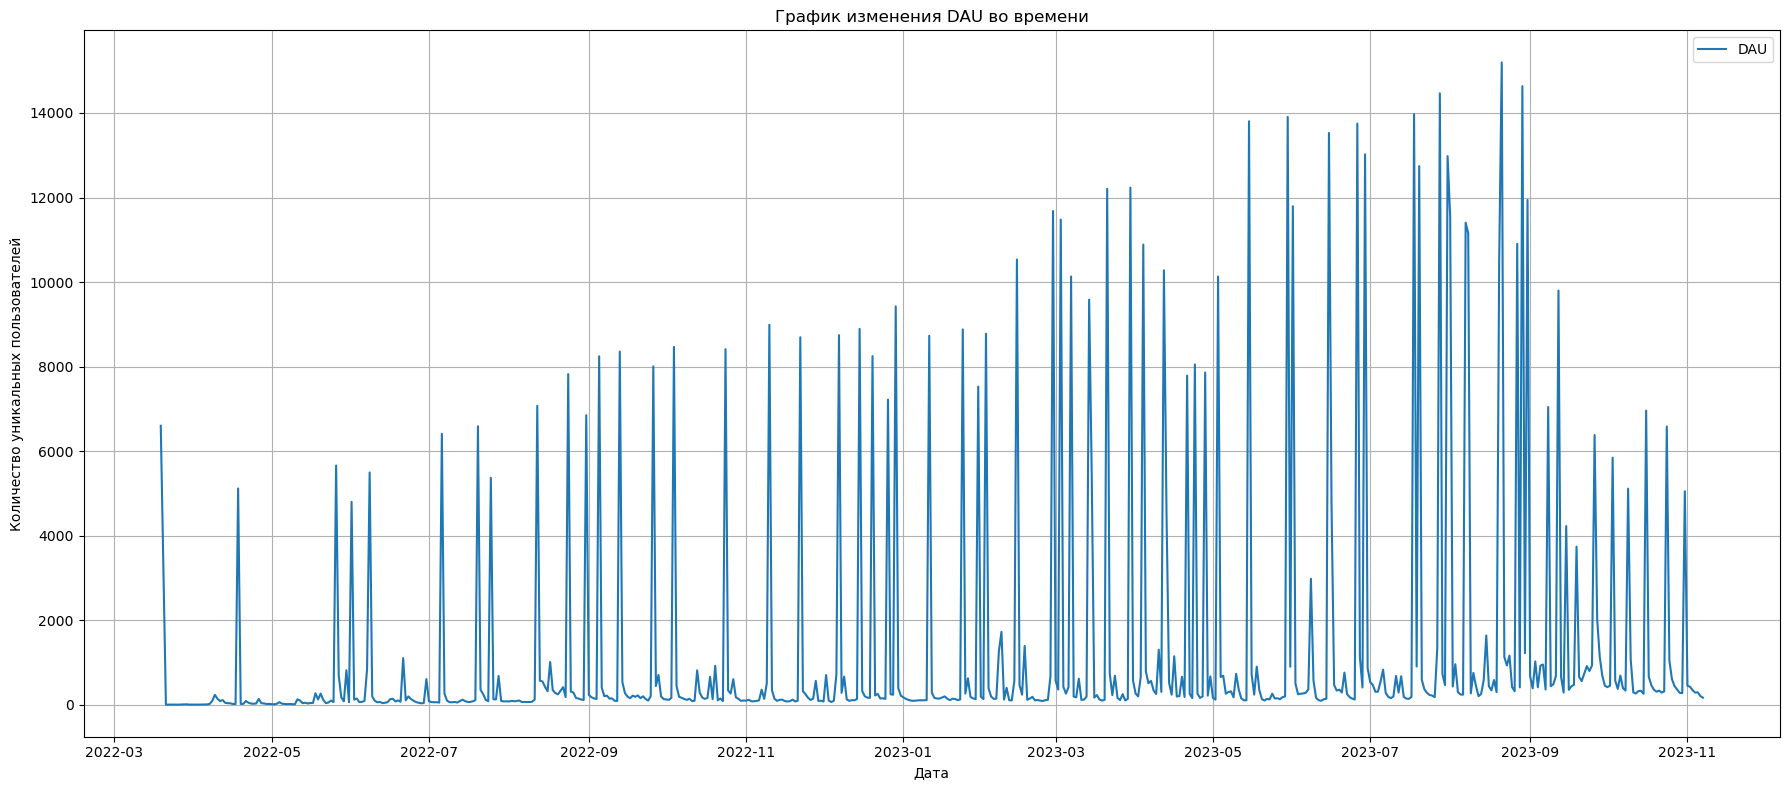

In [50]:
# График DAU
plt.figure(figsize=(18, 8))
plt.plot(dau.index, dau.values, label='DAU')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.title('График изменения DAU во времени')
plt.legend()
plt.grid(True)
plt.tight_layout()



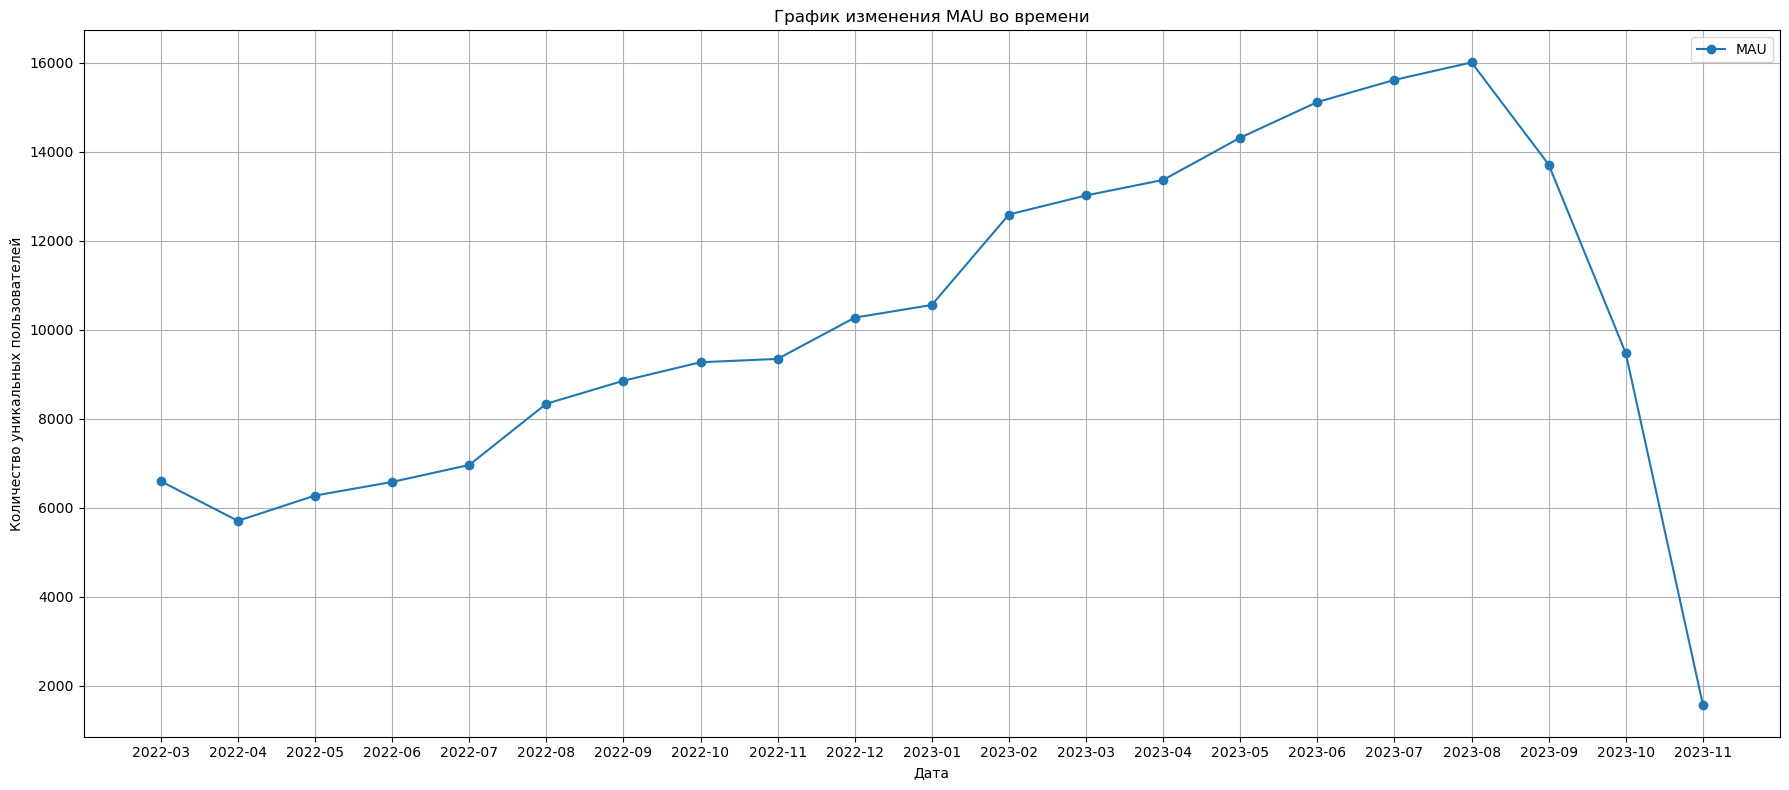

In [51]:
plt.figure(figsize=(18, 8))
plt.plot(mau.index, mau.values, label='MAU', marker='o')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.title('График изменения MAU во времени')
plt.legend()
plt.grid(True)
plt.tight_layout()

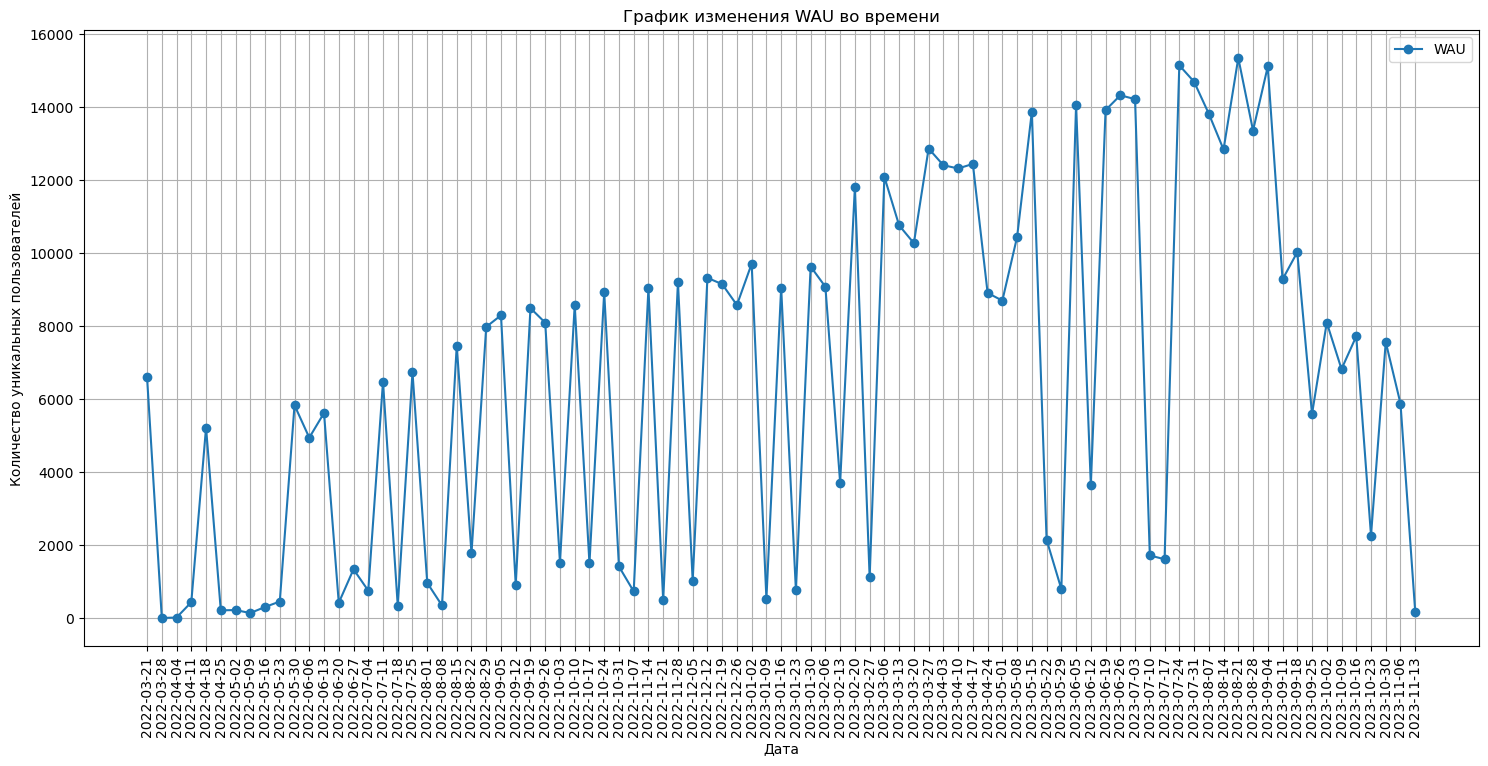

In [52]:
plt.figure(figsize=(18, 8))
plt.plot(wau.index, wau.values, label='WAU', marker='o')
plt.xlabel('Дата')
plt.ylabel('Количество уникальных пользователей')
plt.xticks(rotation=90) 
plt.title('График изменения WAU во времени')
plt.legend()
plt.grid(True)


**Вывод 3 шаг. Продуктовые метрики: DAU, WAU, MAU**

Построен график изменения DAU, WAU, MAU во времени. Три графика сопоставимы друг к другу и видно что сентябрь 2023 года идет рост количества уникальных пользователей, взаимодействовавших с сайтом. После сентября пошел спад. 

# <a id="four"></a> **4 шаг.** Коммерческие метрики   

## <a id="four1"></a> 4.1 Средний чек.

In [53]:
average_order_value = orders['paid'].sum() / orders['order_id'].nunique()

print(f"Средний чек: {average_order_value:.2f}")

Средний чек: 762.23


## <a id="four2"></a> 4.2 Когортный анализ пользователей


In [54]:
action_coh=action
action_coh['cohort_month']=action_coh.groupby('user_id')['month'].transform('min')
action_coh.head()

,action_id,user_action,datetime,channel_id,channel_name,сampaign,source,user_id,mailing_action,mailing_name,not_sent_reason_name,not_delivered_reason_name,date,week,month,cohort_month
0,2734,Импорт при переносе исторической базы клиентов,2022-03-19 21:30:59,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-03-19,2022-03-21,2022-03,2022-03
1,80475,Оплата заказа,2022-04-18 15:48:35,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-04-18,2022-04-18,2022-04,2022-03
2,101792,Оплата заказа,2022-04-18 15:49:50,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-04-18,2022-04-18,2022-04,2022-03
3,632765,Изменение часового пояса клиентов при изменени...,2022-11-23 08:40:16,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-11-23,2022-11-28,2022-11,2022-03
4,632766,Переход на сайт,2022-11-23 08:40:16,1729,utm_term Не указан,ignatij-ovchinnikov,vk,2734,not_info,not_info,not_info,not_info,2022-11-23,2022-11-28,2022-11,2022-03


In [55]:
def get_date(df, column):
    dt_values = pd.to_datetime(df[column])
    year = dt_values.dt.year
    month = dt_values.dt.month
    day = dt_values.dt.day

    return year, month, day

datetime_year, datetime_month, _ = get_date(action_coh, 'datetime')
cohort_year, cohort_month, _ = get_date(action_coh, 'cohort_month')

year_diff = datetime_year - cohort_year
month_diff = datetime_month - cohort_month

action_coh['cohort_index'] = year_diff * 12 + month_diff + 1
action_coh.head()

,action_id,user_action,datetime,channel_id,channel_name,сampaign,source,user_id,mailing_action,mailing_name,not_sent_reason_name,not_delivered_reason_name,date,week,month,cohort_month,cohort_index
0,2734,Импорт при переносе исторической базы клиентов,2022-03-19 21:30:59,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-03-19,2022-03-21,2022-03,2022-03,1
1,80475,Оплата заказа,2022-04-18 15:48:35,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-04-18,2022-04-18,2022-04,2022-03,2
2,101792,Оплата заказа,2022-04-18 15:49:50,1,Административный сайт Mindbox,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-04-18,2022-04-18,2022-04,2022-03,2
3,632765,Изменение часового пояса клиентов при изменени...,2022-11-23 08:40:16,9,Сайт,not_info,not_info,2734,not_info,not_info,not_info,not_info,2022-11-23,2022-11-28,2022-11,2022-03,9
4,632766,Переход на сайт,2022-11-23 08:40:16,1729,utm_term Не указан,ignatij-ovchinnikov,vk,2734,not_info,not_info,not_info,not_info,2022-11-23,2022-11-28,2022-11,2022-03,9


In [56]:
action_coh['cohort_index'].unique()

array([ 1,  2,  9, 10, 12, 13, 14,  4, 11,  3,  5,  6,  7,  8, 15, 16, 17,
       18, 19, 20, 21], dtype=int64)

In [57]:
action_coh_2=action_coh.pivot_table(index='cohort_month',
                      columns='cohort_index',
                      values='user_id',
                      aggfunc=lambda x: len(x.unique()))
action_coh_2

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,,
2022-03,6600.0,4740.0,4642.0,4524.0,4476.0,4445.0,4441.0,4528.0,4450.0,4530.0,...,6053.0,6020.0,5584.0,6030.0,5982.0,5978.0,5986.0,3688.0,2489.0,230.0
2022-04,969.0,850.0,823.0,776.0,772.0,772.0,771.0,769.0,770.0,768.0,...,769.0,720.0,768.0,758.0,755.0,759.0,630.0,330.0,29.0,NaN
2022-05,785.0,748.0,745.0,744.0,743.0,744.0,744.0,743.0,744.0,744.0,...,699.0,748.0,740.0,732.0,730.0,460.0,280.0,13.0,NaN,NaN
2022-06,488.0,450.0,444.0,442.0,443.0,444.0,444.0,441.0,448.0,452.0,...,451.0,447.0,444.0,441.0,301.0,192.0,29.0,NaN,NaN,NaN
2022-07,517.0,483.0,477.0,428.0,427.0,431.0,426.0,429.0,431.0,405.0,...,429.0,423.0,430.0,306.0,183.0,17.0,NaN,NaN,NaN,NaN
2022-08,1451.0,1418.0,1416.0,1346.0,1345.0,1336.0,1333.0,1342.0,1280.0,1343.0,...,1329.0,1335.0,907.0,486.0,42.0,NaN,NaN,NaN,NaN,NaN
2022-09,563.0,552.0,543.0,515.0,510.0,511.0,510.0,492.0,508.0,510.0,...,510.0,464.0,243.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-10,390.0,318.0,375.0,362.0,364.0,366.0,357.0,364.0,361.0,359.0,...,351.0,160.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11,306.0,290.0,275.0,268.0,271.0,266.0,254.0,250.0,248.0,263.0,...,118.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
first_column=action_coh_2.iloc[:,0]
retention=action_coh_2.div(first_column,axis=0)

retention.round(2)

cohort_index,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,,
2022-03,1.0,0.72,0.70,0.69,0.68,0.67,0.67,0.69,0.67,0.69,...,0.92,0.91,0.85,0.91,0.91,0.91,0.91,0.56,0.38,0.03
2022-04,1.0,0.88,0.85,0.80,0.80,0.80,0.80,0.79,0.79,0.79,...,0.79,0.74,0.79,0.78,0.78,0.78,0.65,0.34,0.03,NaN
2022-05,1.0,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,0.95,...,0.89,0.95,0.94,0.93,0.93,0.59,0.36,0.02,NaN,NaN
2022-06,1.0,0.92,0.91,0.91,0.91,0.91,0.91,0.90,0.92,0.93,...,0.92,0.92,0.91,0.90,0.62,0.39,0.06,NaN,NaN,NaN
2022-07,1.0,0.93,0.92,0.83,0.83,0.83,0.82,0.83,0.83,0.78,...,0.83,0.82,0.83,0.59,0.35,0.03,NaN,NaN,NaN,NaN
2022-08,1.0,0.98,0.98,0.93,0.93,0.92,0.92,0.92,0.88,0.93,...,0.92,0.92,0.63,0.33,0.03,NaN,NaN,NaN,NaN,NaN
2022-09,1.0,0.98,0.96,0.91,0.91,0.91,0.91,0.87,0.90,0.91,...,0.91,0.82,0.43,0.04,NaN,NaN,NaN,NaN,NaN,NaN
2022-10,1.0,0.82,0.96,0.93,0.93,0.94,0.92,0.93,0.93,0.92,...,0.90,0.41,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-11,1.0,0.95,0.90,0.88,0.89,0.87,0.83,0.82,0.81,0.86,...,0.39,0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


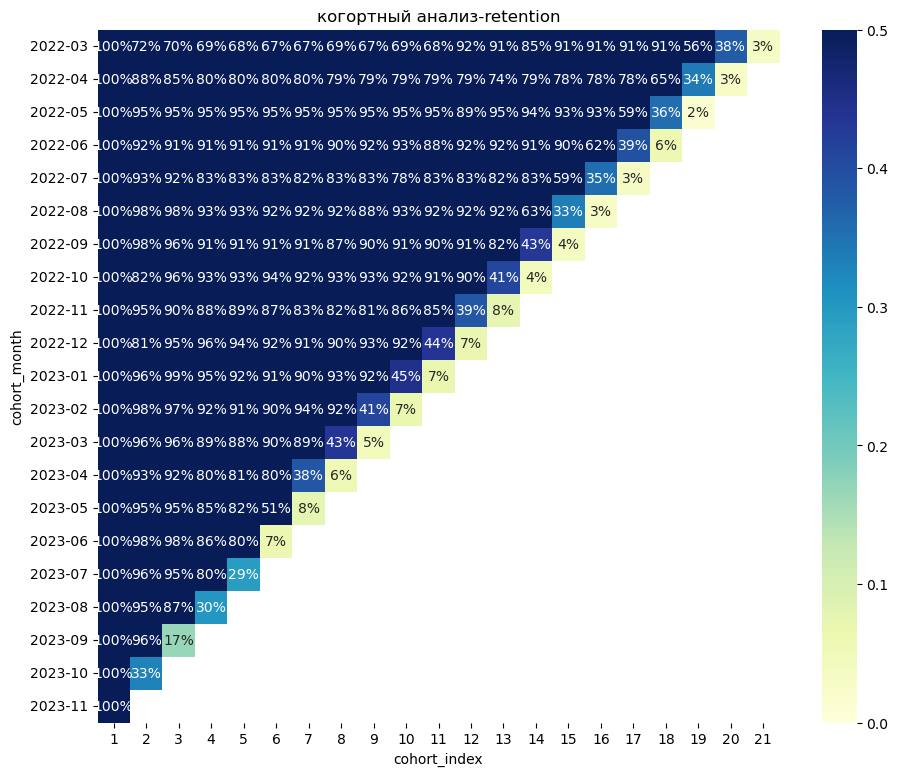

In [59]:

plt.figure(figsize=(11,9))
plt.title('когортный анализ-retention')
sns.heatmap(data=retention,
           annot=True,
           fmt='.0%',
           vmin=0.0,
           vmax=0.5,
           cmap="YlGnBu")
plt.show()


Каждая строка представляет собой определенную когорту, которая обычно формируется на основе времени первого взаимодействия клиента или пользователя с продуктом или услугой.

Каждый столбец представляет собой определенный период времени после начала взаимодействия с когортой (например, первый месяц, второй месяц и т.д.).

Значение в ячейке (i, j) обозначает процент удержания когорты i на j-м периоде времени. Например, если значение равно 30%, это означает, что 30% клиентов из этой когорты остались активными или вернулись в тот период времени.

Если в начальный период retention высок (темные ячейки в первом столбце), и этот уровень удержания сохраняется или даже растет на последующих периодах, это может указывать на успешные стратегии удержания и удовлетворенность клиентов.

Тепловая карта (heatmap) когортного анализа retention (удержания) показывает, что последние 2 месяца все уникальные пользователи из разных периодов времени начали реже заходить на сайт. 21 месяц-ноябрь 2023 года связан с неполнотой данными.Мы имеем только 7 дней ноября. Сентябрь 2023 года так же имеет спад.Если смотреть DAU, WAU, MAU, так же видно что с августа идет спад активности.


## <a id="four3"></a> 4.3 В какой день недели чаще приходят пожертвования

In [60]:
orders['day_of_week'] = orders['datetime'].dt.strftime('%A')

pivot_table_week = pd.pivot_table(orders, 
                             values='paid', 
                             index=['day_of_week'], 
                             aggfunc={'paid': ['count', 'sum']},
                             fill_value=0)


pivot_table_week.columns = ['Кол-во пожертвований', 'Сумма пожертвований']
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot_table_week = pivot_table_week.reindex(days_order)
pivot_table_week


,Кол-во пожертвований,Сумма пожертвований
day_of_week,,
Monday,5011,3750447
Tuesday,6924,5172699
Wednesday,6823,5015869
Thursday,6882,4646486
Friday,6288,5566053
Saturday,4880,3784147
Sunday,4202,3323390


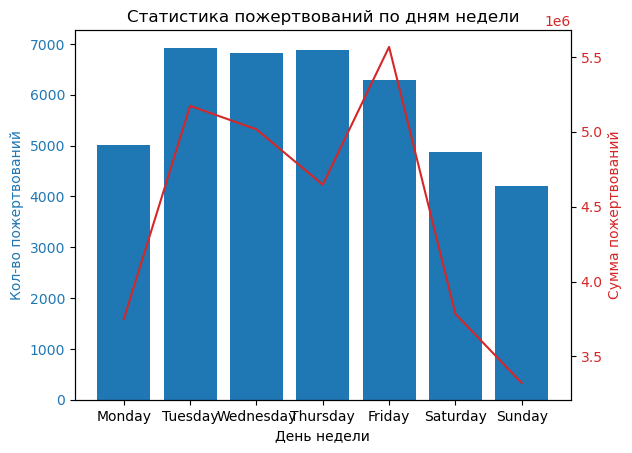

In [112]:

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('День недели')
ax1.set_ylabel('Кол-во пожертвований', color=color)
ax1.bar(pivot_table_week.index, pivot_table_week['Кол-во пожертвований'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Сумма пожертвований', color=color)  
ax2.plot(pivot_table_week.index, pivot_table_week['Сумма пожертвований'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Статистика пожертвований по дням недели')
plt.show()

Если смотреть одновременно и сумму и количество пользователей, то самый эффективные дни это со вторника по пятницу. В выходные дни и понедельник виден спад.

## <a id="four4"></a> 4.4 В какое время суток чаще приходят пожертвования

In [62]:
orders['rounded_hour'] = orders['datetime'].dt.round('H').dt.strftime('%H:%M')
pivot_table_hour = pd.pivot_table(orders, 
                             values='paid', 
                             index=['rounded_hour'],
                             aggfunc={'paid': ['count', 'sum']},
                             fill_value=0)

pivot_table_hour.columns = ['Кол-во пожертвований', 'Сумма пожертвований']
pivot_table_hour

,Кол-во пожертвований,Сумма пожертвований
rounded_hour,,
00:00,14416,10447172
01:00,283,193318
02:00,292,146329
03:00,500,264270
04:00,728,389639
05:00,1053,588845
06:00,1275,886172
07:00,1467,1158437
08:00,1728,1241162


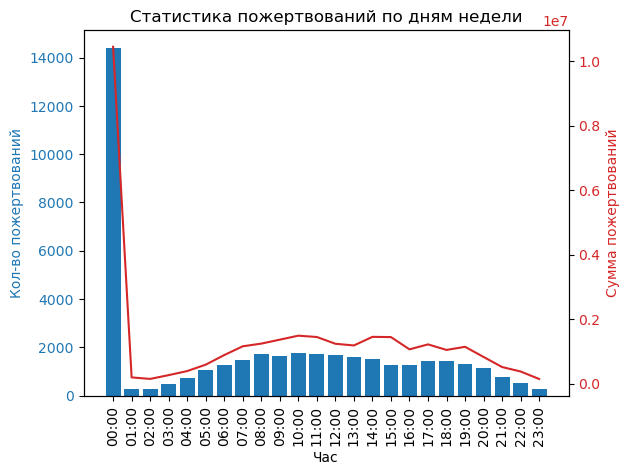

In [63]:

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Час')
ax1.set_ylabel('Кол-во пожертвований', color=color)
ax1.bar(pivot_table_hour.index, pivot_table_hour['Кол-во пожертвований'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Сумма пожертвований', color=color)  
ax2.plot(pivot_table_hour.index, pivot_table_hour['Сумма пожертвований'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Статистика пожертвований по дням недели')
plt.show()

In [115]:
orders[orders['rounded_hour'] == '00:00']

,order_id,datetime,channel_id,channel_name,order_price,recurrent,product_name,paid,order_status,user_id,comparison,month,day_of_week,rounded_hour
20,18942,2021-03-13 00:00:00,1,Административный сайт Mindbox,300,False,На уставную деятельность,300,Paid,6872,True,2021-03,Saturday,00:00
21,27235,2021-12-07 00:00:00,1,Административный сайт Mindbox,300,False,На уставную деятельность,300,Paid,6907,True,2021-12,Tuesday,00:00
22,22912,2021-12-16 00:00:00,1,Административный сайт Mindbox,1000,False,На уставную деятельность,1000,Paid,6937,True,2021-12,Thursday,00:00
23,14588,2022-01-27 00:00:00,1,Административный сайт Mindbox,500,False,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,6959,True,2022-01,Thursday,00:00
28,19157,2021-03-12 00:00:00,1,Административный сайт Mindbox,100,False,На уставную деятельность,100,Paid,7012,True,2021-03,Friday,00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53534,130697,2023-10-06 00:23:00,9,Сайт,300,False,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,41836,True,2023-10,Friday,00:00
53613,131194,2023-10-12 23:36:00,9,Сайт,100,False,Пожертвование Благотворительный фонд «АиФ. Доб...,100,Paid,41890,True,2023-10,Thursday,00:00
53938,133475,2023-11-05 00:22:00,9,Сайт,300,False,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,42097,True,2023-11,Sunday,00:00
54256,133244,2023-11-02 23:42:00,9,Сайт,1500,False,Пожертвование Благотворительный фонд «АиФ. Доб...,1500,Paid,42330,True,2023-11,Thursday,00:00


Итак, у вас есть наблюдение, что большинство пользователей совершают пожертвования в 12 ночи. Многие из них имеют временной штамп "00:00:00".Предположим, что данных о часах и минутах нет, поэтому время записано так. Чтобы лучше понять предпочтения пользователей по времени, вы решили скрыть все пожертвования с временем "00:00:00"

In [65]:
orders_filt = orders.copy()
orders_filt['hour'] = orders['datetime'].dt.strftime('%H:%M')
orders_filt = orders_filt[orders_filt['hour'] != '00:00']
orders_filt[orders_filt['rounded_hour'] == '00:00'].head(5)

,order_id,datetime,channel_id,channel_name,order_price,recurrent,product_name,paid,order_status,user_id,comparison,month,day_of_week,rounded_hour,hour
57,82455,2022-05-16 23:35:00,9,Сайт,500,False,Пожертвование Благотворительный фонд «АиФ. Доб...,500,Paid,7321,True,2022-05,Monday,00:00,23:35
259,107041,2022-12-26 23:33:00,9,Сайт,300,False,Пожертвование Благотворительный фонд «АиФ. Доб...,300,Paid,8113,True,2022-12,Monday,00:00,23:33
376,107746,2023-01-03 23:42:00,9,Сайт,5000,False,Пожертвование Благотворительный фонд «АиФ. Доб...,5000,Paid,8771,True,2023-01,Tuesday,00:00,23:42
380,131328,2023-10-15 00:04:00,9,Сайт,5000,False,Пожертвование Благотворительный фонд «АиФ. Доб...,5000,Paid,8771,True,2023-10,Sunday,00:00,00:04
1611,129578,2023-09-26 23:56:00,9,Сайт,3000,False,Пожертвование Благотворительный фонд «АиФ. Доб...,3000,Paid,11099,True,2023-09,Tuesday,00:00,23:56


In [66]:
pivot_table_hour_filt = pd.pivot_table(orders_filt, 
                             values='paid', 
                             index=['rounded_hour'],
                             aggfunc={'paid': ['count', 'sum']},
                             fill_value=0)

pivot_table_hour_filt.columns = ['Кол-во пожертвований', 'Сумма пожертвований']
pivot_table_hour_filt

,Кол-во пожертвований,Сумма пожертвований
rounded_hour,,
00:00,220,129093
01:00,283,193318
02:00,292,146329
03:00,500,264270
04:00,728,389639
05:00,1053,588845
06:00,1275,886172
07:00,1467,1158437
08:00,1728,1241162


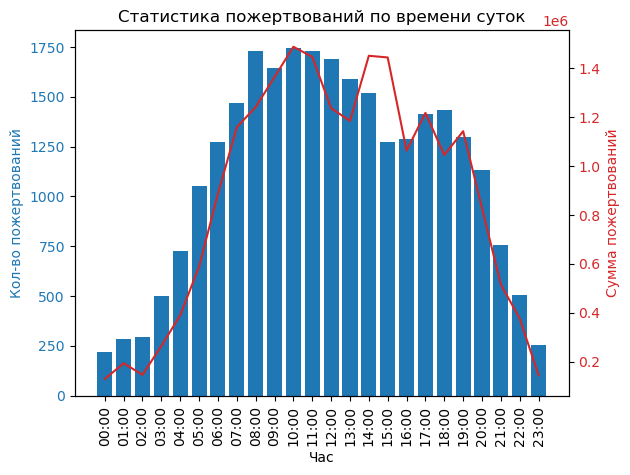

In [116]:
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Час')
ax1.set_ylabel('Кол-во пожертвований', color=color)
ax1.bar(pivot_table_hour_filt.index, pivot_table_hour_filt['Кол-во пожертвований'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Сумма пожертвований', color=color)  
ax2.plot(pivot_table_hour_filt.index, pivot_table_hour_filt['Сумма пожертвований'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Статистика пожертвований по времени суток')
plt.show()

Пик пожертвований приходит с 8 утра до 4 вечера. С 4 до 9 происходит средняя активность.Но надо учесть, что в России разные часовые пояса. Данный момент мы не можем учесть.

Так же можно заметить, что людям комфортно заниматься пожертвованиями в рабочее время.

## <a id="four5"></a> 4.5 RFM анализ: сегменты, статистика по сегментам, поведение по сегментам.

In [68]:
last_day = orders['datetime'].max()
NOW = orders['datetime'].max() + timedelta(days=1)

In [69]:
R = orders.groupby('user_id', as_index=False)['datetime'] \
        .max().rename(columns={'datetime':'last_order'})

R.head()

,user_id,last_order
0,2734,2021-10-14 15:50:00
1,2847,2023-03-29 15:15:00
2,2861,2022-12-07 14:17:00
3,3361,2022-12-20 09:32:00
4,4982,2023-09-22 12:14:00


Recency - время от последней покупки пользователя до текущей даты    


У нас есть данные за три года, поэтому будем считать, что:

- последняя покупка совершена более года назад **R3**

- покупка совершена более двух месяцев назад, но меньше года назад **R2**

- покупка совершалась за последние два месяца **R1**



In [70]:
def recency(x):
    if x >= NOW - timedelta(days=2*30):   # Из текущего времени вычтем 2 месяца
        return 'R1'
    elif x > NOW - timedelta(days=356):
        return 'R2'
    else:
        return 'R3'

R['recency'] = R['last_order'].apply(recency)

R.head()

,user_id,last_order,recency
0,2734,2021-10-14 15:50:00,R3
1,2847,2023-03-29 15:15:00,R2
2,2861,2022-12-07 14:17:00,R2
3,3361,2022-12-20 09:32:00,R2
4,4982,2023-09-22 12:14:00,R1


In [71]:
R.recency.value_counts()

R3    7267
R2    5146
R1    2900
Name: recency, dtype: int64

Frequency- как часто клиенты совершают покупку

In [72]:
F = orders.groupby('user_id', as_index=False)['order_id'].nunique().rename(columns={'order_id':'num_orders'})

F.head()

,user_id,num_orders
0,2734,2
1,2847,2
2,2861,7
3,3361,1
4,4982,6


In [73]:
F['num_orders'].describe()

count    15313.000000
mean         2.678117
std          5.454490
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        152.000000
Name: num_orders, dtype: float64

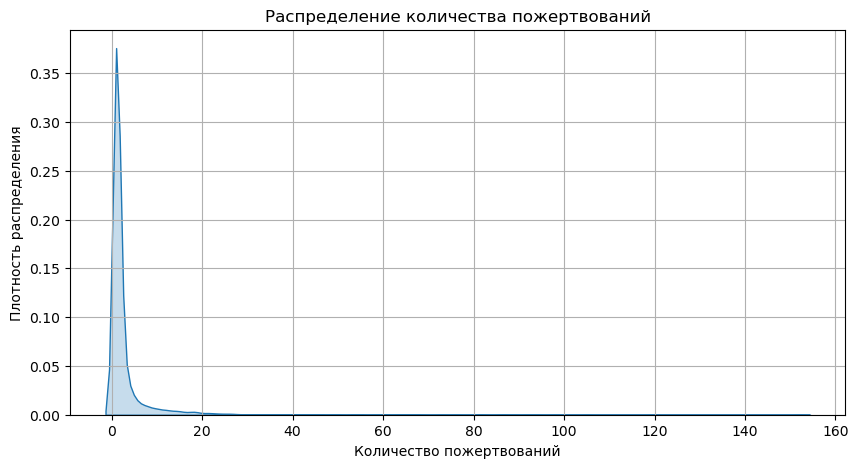

In [74]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение количества пожертвований') 
plt.xlabel('Количество пожертвований') 
plt.ylabel('Плотность распределения') 
plt.grid() 

sns.kdeplot(F['num_orders'], fill=True)

plt.show()

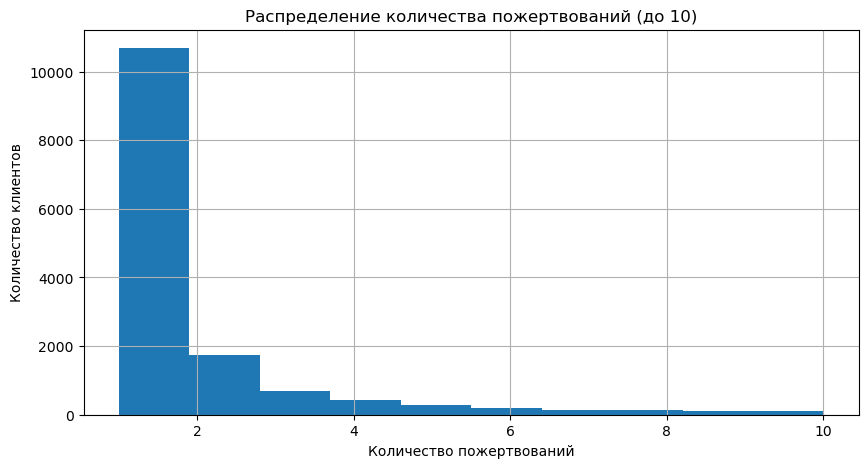

In [75]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение количества пожертвований (до 10)') 
plt.xlabel('Количество пожертвований') 
plt.ylabel('Количество клиентов') 
plt.grid() 
plt.hist(F['num_orders'][F['num_orders'] <= 10], bins=10)

plt.show()

In [76]:
F['num_orders'].value_counts()

1     10684
2      1750
3       700
4       432
5       274
      ...  
61        1
89        1
92        1
60        1
39        1
Name: num_orders, Length: 72, dtype: int64

- Редкие клиенты — одно пожертвование **F3**
- от 1 до 5 пожертвований — клиенты со средней активностью **F2**
- больше 5 пожертвований — частые клиенты **F1**



In [77]:
def frequency(x):
    if x <= 1:
        return 'F3'
    elif x <= 5:
        return 'F2'
    else:
        return 'F1'

F['frequency'] = F['num_orders'].apply(frequency)

In [78]:
F['frequency'].value_counts()

F3    10684
F2     3156
F1     1473
Name: frequency, dtype: int64

In [79]:
F.head()

,user_id,num_orders,frequency
0,2734,2,F2
1,2847,2,F2
2,2861,7,F1
3,3361,1,F3
4,4982,6,F1



Monetary

какую сумму клиенты тратят


In [80]:
M = orders.groupby('user_id', as_index=False)['paid'].sum().rename(columns={'paid':'tot_sum'})

M.head()

,user_id,tot_sum
0,2734,51
1,2847,500
2,2861,120
3,3361,3000
4,4982,340


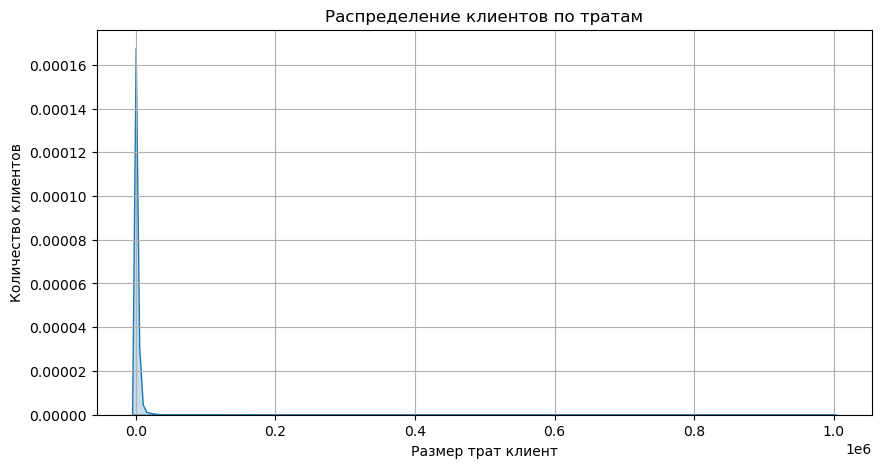

In [81]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение клиентов по тратам') 
plt.xlabel('Размер трат клиент') 
plt.ylabel('Количество клиентов') 
plt.grid() 

sns.kdeplot(M['tot_sum'], fill=True)

plt.show()

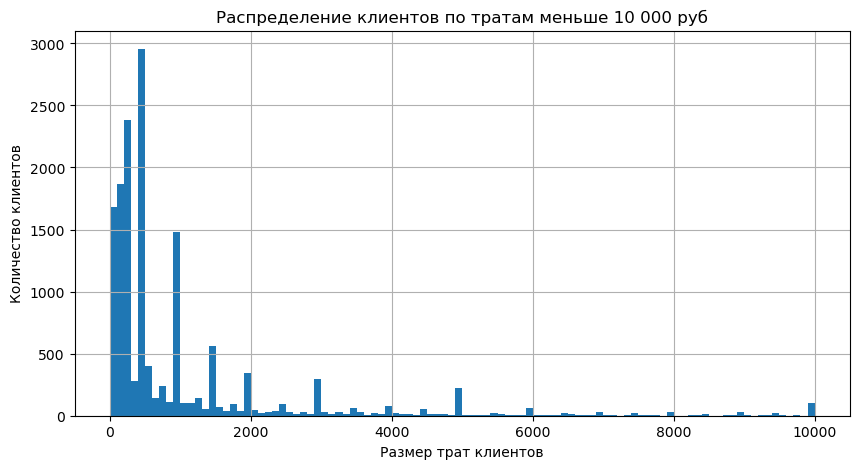

In [117]:
plt.figure(figsize=(10, 5)) 
plt.title('Распределение клиентов по тратам меньше 10 000 руб') 
plt.xlabel('Размер трат клиентов') 
plt.ylabel('Количество клиентов') 
plt.grid() 
plt.hist(M['tot_sum'][M['tot_sum'] <= 10000], bins=100)

plt.show()

In [83]:
M['tot_sum'].describe()

count     15313.000000
mean       2041.343368
std       12362.064367
min           1.000000
25%         300.000000
50%         500.000000
75%        1000.000000
max      999000.000000
Name: tot_sum, dtype: float64

- Клиенты, потратившие от 10 000 и больше **M1**
- от 1 000 до 10 000 - **M2**
- меньше 1 000 - **М3**

In [84]:
def monetary(x):
    if x <= 1000:
        return 'M3'
    elif x <= 10000:
        return 'M2'
    else:
        return 'M1'

M['monetary'] = M['tot_sum'].apply(monetary) 

M['monetary'].value_counts()

M3    11547
M2     3336
M1      430
Name: monetary, dtype: int64

In [85]:
M.head()

,user_id,tot_sum,monetary
0,2734,51,M3
1,2847,500,M3
2,2861,120,M3
3,3361,3000,M2
4,4982,340,M3


In [86]:
RFM =pd.merge(R, F, on = 'user_id').merge(M, on = 'user_id')

RFM.head()

,user_id,last_order,recency,num_orders,frequency,tot_sum,monetary
0,2734,2021-10-14 15:50:00,R3,2,F2,51,M3
1,2847,2023-03-29 15:15:00,R2,2,F2,500,M3
2,2861,2022-12-07 14:17:00,R2,7,F1,120,M3
3,3361,2022-12-20 09:32:00,R2,1,F3,3000,M2
4,4982,2023-09-22 12:14:00,R1,6,F1,340,M3


In [87]:
RFM['rfm_group'] = RFM['recency'] + RFM['frequency'] + RFM['monetary']
RFM.head()

,user_id,last_order,recency,num_orders,frequency,tot_sum,monetary,rfm_group
0,2734,2021-10-14 15:50:00,R3,2,F2,51,M3,R3F2M3
1,2847,2023-03-29 15:15:00,R2,2,F2,500,M3,R2F2M3
2,2861,2022-12-07 14:17:00,R2,7,F1,120,M3,R2F1M3
3,3361,2022-12-20 09:32:00,R2,1,F3,3000,M2,R2F3M2
4,4982,2023-09-22 12:14:00,R1,6,F1,340,M3,R1F1M3


<Axes: xlabel='frequency', ylabel='recency'>

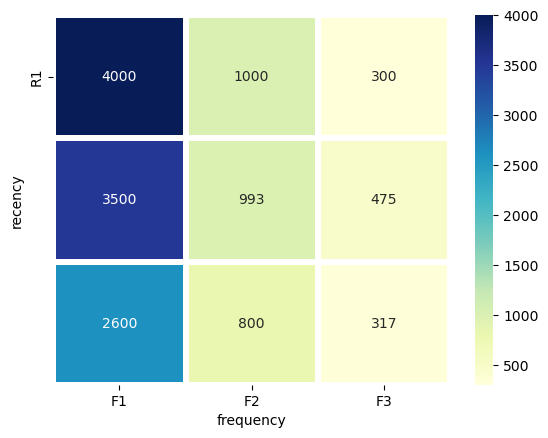

In [88]:
viz = RFM.pivot_table(
                                    index='recency',
                                    columns='frequency',
                                    values='tot_sum',
                                    aggfunc=np.median).applymap(int)
sns.heatmap(viz,cmap='YlGnBu', annot=True, fmt='.0f', linewidth=4.15, annot_kws={"size":10}, yticklabels=4)

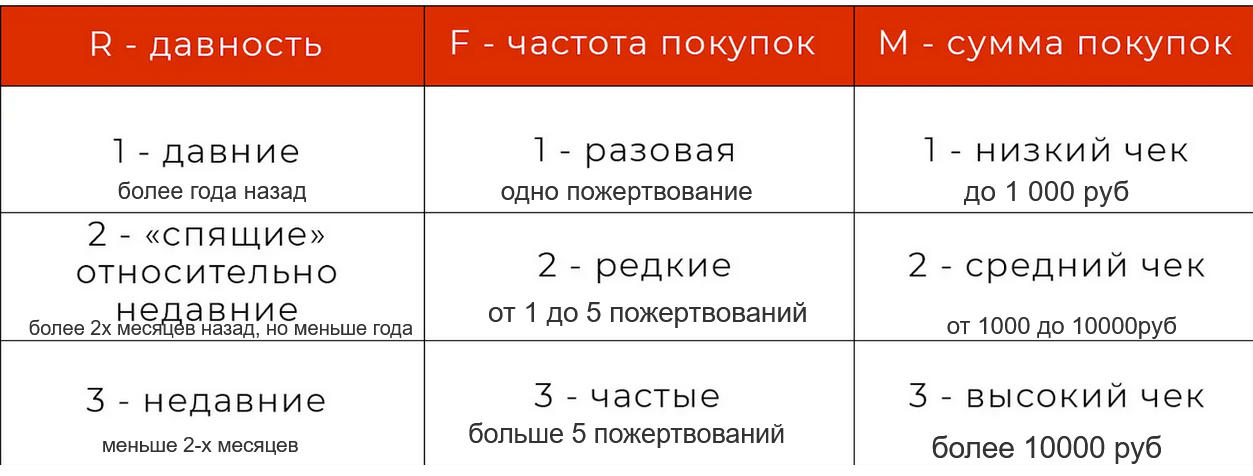

Больше всего жертвуют клиенты посещающие сайт более года назад и сделали одно пожертвование. Меньше всего клиенты посещающие сайт более года назад и сделали много пожертвований.

In [89]:
rfm_mean_metrics = RFM.groupby('rfm_group') \
        .agg({'tot_sum':'mean',
              'num_orders':'mean', 
              'last_order':'max', 
              'user_id':'nunique'}) \
        .rename(columns={'tot_sum':'Средний расход, руб.',
                         'num_orders': 'Средняя частота заказа',
                         'last_order': 'Дата последнего заказа',
                         'user_id': 'Размер групп'})

In [90]:
rfm_mean_metrics= rfm_mean_metrics.sort_values(by='Средняя частота заказа', ascending=False)
rfm_mean_metrics

,"Средний расход, руб.",Средняя частота заказа,Дата последнего заказа,Размер групп
rfm_group,,,,
R1F1M1,35386.924324,23.751351,2023-11-09 12:10:00,185
R2F1M1,48063.700000,21.314286,2023-09-10 05:32:00,70
R1F1M2,4095.584369,14.730018,2023-11-09 13:03:00,563
R3F1M1,42037.257143,13.542857,2022-11-14 00:00:00,35
R3F1M2,3669.808917,12.726115,2022-11-19 00:00:00,157
R2F1M2,3802.764706,11.330882,2023-09-11 10:07:00,272
R3F1M3,653.953488,10.255814,2022-11-18 00:00:00,43
R1F1M3,632.959596,9.959596,2023-11-09 11:50:00,99
R2F1M3,611.734694,9.551020,2023-09-11 01:58:00,49


In [91]:
количество_строк = rfm_mean_metrics.shape[0]
print(f"Количество сегментов в таблице RFM: {количество_строк}")

Количество сегментов в таблице RFM: 27


In [92]:
rfm_mean_metrics.style.format(thousands='.', decimal=',', precision=2).bar(cmap='PuBu')

,"Средний расход, руб.",Средняя частота заказа,Дата последнего заказа,Размер групп
rfm_group,,,,
R1F1M1,"35.386,92","23,75",2023-11-09 12:10:00,185
R2F1M1,"48.063,70","21,31",2023-09-10 05:32:00,70
R1F1M2,"4.095,58","14,73",2023-11-09 13:03:00,563
R3F1M1,"42.037,26","13,54",2022-11-14 00:00:00,35
R3F1M2,"3.669,81","12,73",2022-11-19 00:00:00,157
R2F1M2,"3.802,76","11,33",2023-09-11 10:07:00,272
R3F1M3,"653,95","10,26",2022-11-18 00:00:00,43
R1F1M3,"632,96","9,96",2023-11-09 11:50:00,99
R2F1M3,"611,73","9,55",2023-09-11 01:58:00,49


Сегменты раздроблены от 9 до 5398 клиентов. 

Таблицу с user_id каждого клиента будет отправлена клиенту отдельным файлом.

Отметим самые яркие сегменты:R1F1M1, R2F1M1, R1F1M2, R3F1M1, R3F1M2, R2F1M2, R3F1M3, R1F1M3, R2F1M3 ( первые 9 строк)- Высокая частота пожертвований. За счет этого средняя сумма пожертвования от 611,73 до 48.063,70 руб. Общее количество данных клиентов примерно 1000.

R1F2M1, R1F2M2, R2F2M1, R2F2M2, R3F2M2, R3F2M1, R1F2M3, R2F2M3, R3F2M3 (от 10 до 18 строки)- в сумме это 3547 клиентов. Они делали пожертвования более 1 раза и в у них средний чек от 533,17 до 29.867,43руб.

R1F3M3, R2F3M1, R2F3M2, R2F3M3, R1F3M2, R1F3M1, R3F3M1, R3F3M2, R3F3M3 (последние 9 строк)- большинство клиентов-6694. Проблема этих клиентов, что они делали только одно пожертвования со средним чеком от 371,50 руб до 44.242,31.

В таблице выше так же указано время последнего захода.К сожалению это данные самого последнего захода одного клиента в сегменте, что значит что некоторые клиенты из данного сегмента заходили еще давнее. Но я оставила данный столбец, что бы было видно как прошла сегментация 


## <a id="four6"></a> 4.6 Топы по пожертвованиям

In [93]:
print(f"Количество целей пожертвований : {len(orders['product_name'].unique())}")

Количество целей пожертвований : 133


In [94]:
pivot_table_2 = pd.pivot_table(orders, values='paid', index='product_name', aggfunc='sum').sort_values(by='paid', ascending=False).head(10)
pivot_table_2

,paid
product_name,
На уставную деятельность,8557300
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование (хочу помочь),2159638
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Пожертвование на уставную деятельность БФ «АиФ. Доброе сердце»,1605721
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Егор Цуканов,1109190
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Никита Яковлев,795460
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Максим Широкин,738245
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Игнатий Овчинников,672851
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Герман Семёнов,624675
Пожертвование Благотворительный фонд «АиФ. Доброе сердце» Софья Пантурова,596626


Text(0.5, 1.0, 'Круговая диаграмма оплаченных сумм по продуктам')

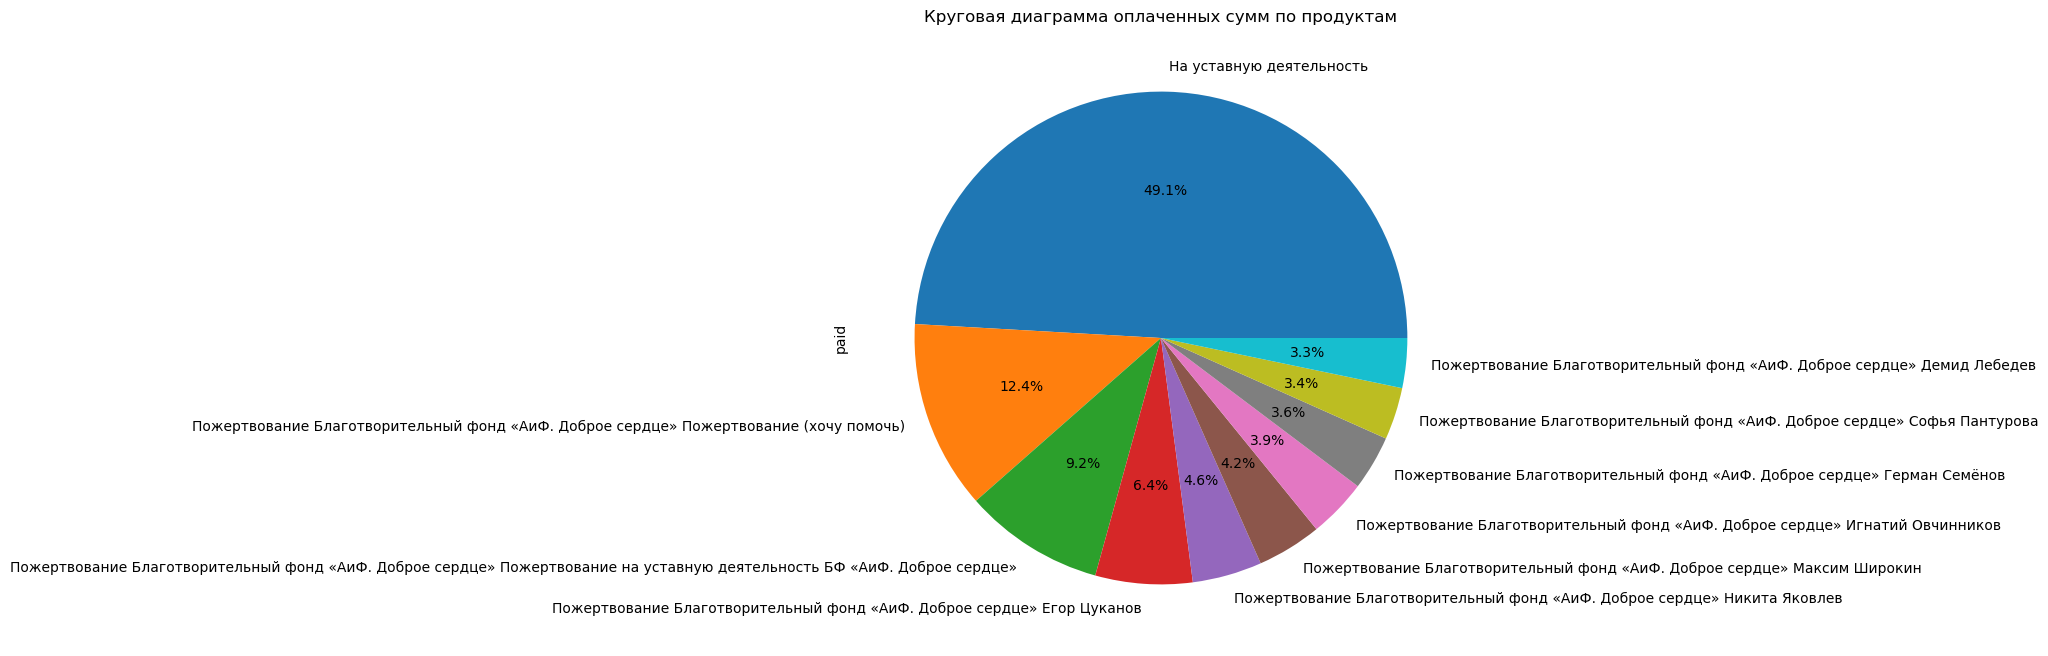

In [95]:
pivot_table_2.plot.pie(y='paid', autopct='%1.1f%%', legend=False, figsize=(8, 8))

plt.title('Круговая диаграмма оплаченных сумм по продуктам')

**Вывод 4 шаг. Коммерческие метрики**

1. Средний чек: 762.23

2. Когортный анализ пользователей     

    Тепловая карта (heatmap) когортного анализа retention (удержания) показывает, что последние 2 месяца все уникальные пользователи из разных периодов времени начали реже заходить на сайт. 21 месяц-ноябрь 2023 года связан с неполнотой данными.Мы имеем только 7 дней ноября. Сентябрь 2023 года так же имеет спад.Если смотреть DAU, WAU, MAU, так же видно что с августа идет спад активности.

3. В какой день недели чаще приходят пожертвования     

    Если смотреть одновременно и сумму пожертвований и количество пользователей, то самый эффективные дни это со вторника по пятницу. В выходные дни и понедельник виден спад.    

4. В какое время суток чаще приходят пожертвования

    Мы скрыли данные с часами-минутами-секундами "00:00:00", так как данные платежи зафиксировали день, но не время.
    Пик пожертвований приходит с 8 утра до 4 вечера. С 4 до 9 происходит средняя активность.Но надо учесть, что в России разные часовые пояса. Данный момент мы не можем учесть.   
    Так же можно заметить, что людям комфортно заниматься пожертвованиями в рабочее время.

5. RFM анализ    
    Количество сегментов в таблице RFM: 27
    R1F1M1, R2F1M1, R1F1M2, R3F1M1, R3F1M2, R2F1M2, R3F1M3, R1F1M3, R2F1M3 ( первые 9 строк)- Высокая частота пожертвований. За счет этого средняя сумма пожертвования от 611,73 до 48.063,70 руб. Общее количество данных клиентов примерно 1000.

    R1F2M1, R1F2M2, R2F2M1, R2F2M2, R3F2M2, R3F2M1, R1F2M3, R2F2M3, R3F2M3 (от 10 до 18 строки)- в сумме это 3547 клиентов. Они делали пожертвования более 1 раза и в у них средний чек от 533,17 до 29.867,43руб.

    R1F3M3, R2F3M1, R2F3M2, R2F3M3, R1F3M2, R1F3M1, R3F3M1, R3F3M2, R3F3M3 (последние 9 строк)- большинство клиентов-6694. Проблема этих клиентов, что они делали только одно пожертвования со средним чеком от 371,50 руб до 44.242,31.

6. Топы по пожертвованиям   
    Количество целей пожертвований : 133
 
    58,3% на уставную деятельность 10 163 021 руб   
    12,4% пожертвование (хочу помочь)	2 159 638 руб   
    6,4% Егор Цуканов	1 109 190 руб   
    4,6% Никита Яковлев	795 460 руб    
    4,2% Максим Широкин	738 245 руб   и т.д.
   



# <a id="five"></a> **5 шаг.** Маркетинговые метрики     

## <a id="five1"></a> 5.1 Анализ каналов привлечения.Главный источник входа (первый) для пользователей

In [96]:
unique_users_by_channel = action.groupby('channel_name')['user_id'].nunique()
table_3 = pd.DataFrame({'Канал': unique_users_by_channel.index, 'Уникальные пользователи': unique_users_by_channel.values})
table_3 = table_3.sort_values(by='Уникальные пользователи', ascending=False)
table_3.head(10)

,Канал,Уникальные пользователи
214,Административный сайт Mindbox,19461
7,Email,19162
216,Сайт,19014
176,utm_term Не указан,6265
215,Прямой переход,5327
183,vk.com,1526
203,yandex.ru,881
86,instagram.com,822
206,yoomoney.ru,517
144,roditeli,440


In [97]:
def get_profiles(action, orders):

    profiles = (
        action.sort_values(by=['user_id', 'datetime'])
        .groupby('user_id')
        .agg(
            {
                'datetime': 'first',
                'channel_name': 'first'
            }
        )
        .rename(columns={'datetime': 'first_ts'})
        .reset_index()
    )

    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    return profiles

In [98]:
profiles = get_profiles(action, orders)
profiles.head(20)

,user_id,first_ts,channel_name,payer
0,2734,2022-03-19 21:30:59,Сайт,True
1,2847,2022-03-19 21:31:01,Сайт,True
2,2861,2022-03-19 21:31:01,Сайт,True
3,3361,2022-03-19 21:31:06,Сайт,True
4,4982,2022-03-19 21:31:21,Сайт,True
5,6872,2022-03-19 21:31:34,Сайт,True
6,6907,2022-03-19 21:31:34,Сайт,True
7,6915,2022-03-19 21:31:34,Сайт,False
8,6930,2022-03-19 21:31:35,Сайт,False
9,6937,2022-03-19 21:31:35,Сайт,True


Text(0.5, 1.0, 'Круговая диаграмма пользователей(False-нет пожертвований, True- есть пожертвования)')

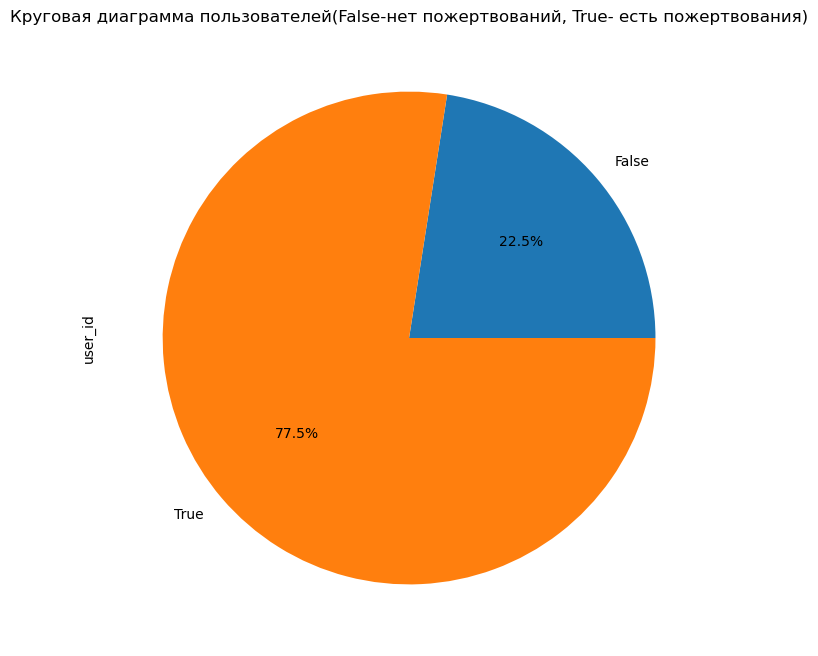

In [99]:
pivot_table_3 = profiles.groupby('payer')['user_id'].nunique()

pivot_table_3.plot.pie(y='user_id', autopct='%1.1f%%', legend=False, figsize=(8, 8))

plt.title('Круговая диаграмма пользователей(False-нет пожертвований, True- есть пожертвования)')


In [100]:
profiles_channel = (
    profiles.groupby('channel_name')[['user_id', 'payer']]
    .agg({'user_id': 'count', 'payer': 'sum'})
    .reset_index()
)

profiles_channel['%payer'] = round(profiles_channel['payer'] / profiles_channel['user_id'] * 100, 2)

profiles_channel

,channel_name,user_id,payer,%payer
0,Email,502,50,9.96
1,Административный сайт Mindbox,450,426,94.67
2,Сайт,18790,14818,78.86


[Text(0.5, 0, 'Источники привлечения'),
 Text(0, 0.5, 'Количество пользователей')]

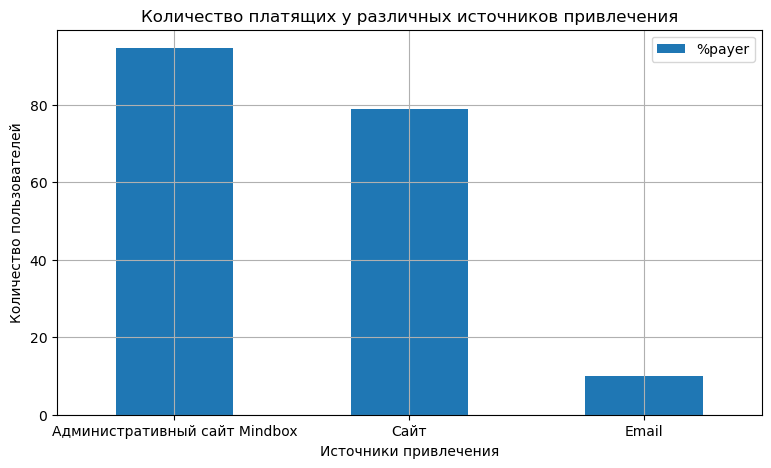

In [118]:
plt.figure(figsize=(20, 5))

ax1 = plt.subplot(1, 2, 1)
profiles_channel.sort_values(by='%payer', ascending=False).plot.bar(
                                                           x='channel_name', y=['%payer'], grid=True,
                                                           title='Количество платящих у различных источников привлечения', 
                                                           rot=0, ax=ax1).set(xlabel='Источники привлечения', 
                                                                               ylabel='Количество пользователей')

Количество уникальных значений в имени канала привлечения пользователя 223   

Топ 10: Административный сайт Mindbox, Email, Сайт, utm_term Не указан, Прямой переход, vk.com, yandex.ru, instagram.com, yoomoney.ru, roditeli

Первый источник входа  для пользователей: Административный сайт Mindbox, Email,Сайт. Первый раз заходят только через эти три источника.
Так же почти все, приходящие через Административный сайт Mindbox делают пожертвование(94,67%), но таких клиентов всего 2%
Если заходят через Email, то только 9,96% делают пожертвования.
И в основном заходят через сайт. Что является немного подозрительно, так как обычно клиенты реагируют на рекламу приходят со сторонних сайтов.

Так же 77,5% пришедших делают в итоге пожертвования.



## <a id="five2"></a> 5.2 Акции, которые привлекли максимально пользователей.

In [102]:
filtered_action = action[action['сampaign']!= 'not_info']
unique_users_by_сampaign = filtered_action.groupby(['сampaign', 'source'])['user_id'].nunique().reset_index()

table_4 = pd.DataFrame({
    'Рекламная компания': unique_users_by_сampaign['сampaign'],
    'Источник': unique_users_by_сampaign['source'],
    'Уникальные пользователи': unique_users_by_сampaign['user_id']
})

table_4 = table_4.sort_values(by='Уникальные пользователи', ascending=False)
table_4.head(10)

,Рекламная компания,Источник,Уникальные пользователи
238,kristina razzhivina,mindbox,635
318,oleg-romanov,mindbox,525
222,ivan-zelenov,mindbox,525
375,snezhana-o,mindbox,524
121,darya-semenova,mindbox,515
300,nikita-kurakin,mindbox,511
358,ruslan-safronov,mindbox,510
251,maksim-shirokin,mindbox,505
31,74316780,yandex-direct,493
179,german-i-grigorij-alymovy,mindbox,471


In [103]:
print(f"Минимальная дата акции kristina razzhivina: {action[action['сampaign'] == 'kristina razzhivina']['datetime'].min()}")
print(f"Максимальная дата  акции kristina razzhivina: {action[action['сampaign'] == 'kristina razzhivina']['datetime'].max()}")

Минимальная дата акции kristina razzhivina: 2022-09-29 23:19:04
Максимальная дата  акции kristina razzhivina: 2023-10-16 08:07:52


In [104]:
print(f"Минимальная дата акции oleg-romanov: {action[action['сampaign'] == 'oleg-romanov']['datetime'].min()}")
print(f"Максимальная дата  акции oleg-romanov: {action[action['сampaign'] == 'oleg-romanov']['datetime'].max()}")

Минимальная дата акции oleg-romanov: 2023-03-20 15:12:54
Максимальная дата  акции oleg-romanov: 2023-09-30 13:22:11


In [105]:
print(f"Минимальная дата акции ivan-zelenov: {action[action['сampaign'] == 'ivan-zelenov']['datetime'].min()}")
print(f"Максимальная дата  акции ivan-zelenov: {action[action['сampaign'] == 'ivan-zelenov']['datetime'].max()}")

Минимальная дата акции ivan-zelenov: 2023-02-08 11:56:50
Максимальная дата  акции ivan-zelenov: 2023-08-23 08:06:33


Большинство уникальных пользователей привлекло акции с kristina razzhivina, oleg-romanov, ivan-zelenov и т.д. Мы не можем посмотреть как это повлияло на оплату по месяцам, так как акции длились более 1 месяца.

## <a id="five3"></a> 5.3 Анализ Email рассылок.

In [106]:
filtered_action_2 = action[action['mailing_action']!= 'not_info']
filtered_action_2['mailing_action'].unique()

array(['Dispatch', 'MailingNotDelivered', 'MailingSend', 'MailingOpen',
       'MailingNotSent', 'MailingClick', 'MailingUnsubscribe'],
      dtype=object)

- Dispatch - Рассылка
- MailingNotDelivered - Рассылка не доставлена
- MailingSend - Рассылка отправлена
- MailingOpen - Рассылка открыта
- MailingNotSent - Рассылка не отправлена
- MailingClick - Клик по рассылке
- MailingUnsubscribe - Отписка от рассылки

In [107]:
unique_users_by_mailing_action = filtered_action_2.groupby('mailing_action')['user_id'].nunique()
table_4 = pd.DataFrame({'Статус отправки рассылки': unique_users_by_mailing_action.index, 'Количество пользователей': unique_users_by_mailing_action.values})
table_4 = table_4.sort_values(by='Количество пользователей', ascending=False)
table_4

,Статус отправки рассылки,Количество пользователей
0,Dispatch,19279
5,MailingSend,19029
4,MailingOpen,12271
3,MailingNotSent,5466
1,MailingClick,3892
2,MailingNotDelivered,2440
6,MailingUnsubscribe,1314


In [108]:
filtered_action_3 = filtered_action_2[filtered_action_2['not_sent_reason_name']!= 'not_info']
unique_users_by_not_sent_reason_name = filtered_action_3.groupby('not_sent_reason_name')['user_id'].nunique()
table_5 = pd.DataFrame({'Количество пользователей': unique_users_by_not_sent_reason_name})
table_5 = table_5.sort_values(by='Количество пользователей', ascending=False)
table_5

,Количество пользователей
not_sent_reason_name,
"Статус подписки клиента должен быть ""Требует подтверждения""",3270
Клиент отписан от рассылок,1241
Невалидный контакт,789
Отсутствует контакт,133
Вебпуш-контакт отписался от рассылок или устарел. При следующем посещении сайта контакт будет автоматически обновлен.,129
Email сообщение некорректно,55


In [109]:
filtered_action_4 = filtered_action_2[filtered_action_2['not_delivered_reason_name']!= 'not_info']
unique_users_by_not_delivered_reason_name = filtered_action_4.groupby('not_delivered_reason_name')['user_id'].nunique()
table_6 = pd.DataFrame({'Количество пользователей': unique_users_by_not_delivered_reason_name})
table_6 = table_6.sort_values(by='Количество пользователей', ascending=False)
table_6

,Количество пользователей
not_delivered_reason_name,
[Email]: Произошел обрыв соединения при отправке,989
[Email]: Несуществующий адрес,834
[Email]: Ящик переполнен,226
[Email]: На указанном домене отсутствует почтовый сервер,220
"[Email]: Отклонено, т.к. адрес в ""черном"" списке",201
[Email]: Отклонено из-за содержимого,130
[Email]: Отклонено по неизвестной причине,99
[Email]: Ошибка протокола или превышение ожидания ответа сервера,51
"[Email]: Отклонено, т.к. получающий сервер не принимает письма на указанный домен",38


**Вывод 5 шаг.Маркетинговые метрики**

1. Анализ каналов привлечения.Главный источник входа (первый) для пользователей    
Количество уникальных значений в имени канала привлечения пользователя 223   

Топ 10: Административный сайт Mindbox, Email, Сайт, utm_term Не указан, Прямой переход, vk.com, yandex.ru, instagram.com, yoomoney.ru, roditeli

Первый источник входа  для пользователей: Административный сайт Mindbox, Email,Сайт. Первый раз заходят только через эти три источника.
Так же почти все, приходящие через Административный сайт Mindbox делают пожертвование(94,67%), но таких клиентов всего 2%
Если заходят через Email, то только 9,96% делают пожертвования.
И в основном заходят через сайт. Что является немного подозрительно, так как обычно клиенты реагируют на рекламу приходят со сторонних сайтов.   

Так же 77,5% пришедших делают в итоге пожертвования.

2. Акции, которые привлекли максимально пользователей.    
Большинство уникальных пользователей привлекло акции с kristina razzhivina, oleg-romanov, ivan-zelenov и т.д. 

3. Анализ Email рассылок.

- Dispatch - Рассылка 19279 пользователей  
- MailingNotDelivered - Рассылка не доставлена 19029 пользователей  
- MailingSend - Рассылка отправлена 12271 пользователей     
- MailingOpen - Рассылка открыта 5466 пользователей      
- MailingNotSent - Рассылка не отправлена 3892 пользователей    
- MailingClick - Клик по рассылке 2440 пользователей   
- MailingUnsubscribe - Отписка от рассылки 1314 пользователей   
  В итоге из 19279 писем открывает только 2440 пользователя.

  Топ причины почему письма не отправляются: Статус подписки клиента должен быть "Требует подтверждения", Клиент отписан от рассылок, Невалидный контакт,Отсутствует контакт и т.д.

    Топ причины почему письма не доходят:Произошел обрыв соединения при отправке,  Несуществующий адрес, Ящик переполнен, На указанном домене отсутствует почтовый сервер,Отклонено, т.к. адрес в "черном" списке.

# <a id="six"></a> **6 шаг.** Общий вывод 

**Вывод 1 шаг. Загрузка и предобработка данных**

1. Таблица `action`- данные о действиях пользователей.       

Описание данных:    
- `action_id`-Идентификатор действия пользователя,         
- `user_action`- Имя действия пользователя,    
- `datetime`-Дата и время создания действия пользователя ,    
- `channel_id`-Идентификатор канала привлечения,     
- `channel_name`- Имя канала привлечения пользователя,    
- `сampaign`-Название рекламной кампании,         
- `source`-Ресурс, на котором проводится рекламная кампания,       
- `user_id-`Идентификатор пользователя (mindbox),        
- `mailing_action`-Статус отправки рассылки,      
- `mailing_name`-Название акции в рассылке,            
- `not_sent_reason_name`-Название причины неотправки рассылки,           
- `not_delivered_reason_name`-Название причины недоставки рассылки.   

Таблица `orders`- данные о платежах пользователей.       

Описание данных:    
- `order_id`-Идентификатор платежа,          
- `datetime`-Дата и Время первого действия,       
- `channel_id`- Идентификатор канала привлечения первого действия,       
- `channel_name`-Внешний идентификатор канала привлечения первого действия,       
- `order_price`-Итоговая стоимость заказа,       
- `recurrent`-Поле заказа повтор,  
- `product_name`- название продукта,   
- `paid`-Поле цена линии,       
- `order_status`-Идентификатор статуса заказа (внешний),       
- `user_id`-Идентификатор пользователя mindbox (для связи таблиц)\

2. В таблице `action` и `orders` присутствуют пропуски. Так как строки с пропусками мы не можем удалить или заменить, мы вместо `Nan` поставили `not_info`. В столбце `orders['recurrent']`  заменили пропуски на False и поменяли тип данных на bool

3. В обоих таблицах `action` и `orders` столбец `datetime` из типа object поменяли на date.

4. Явных и не явных дубликатов не обнаружено.

**Вывод 2 шаг. Исследовательский анализ данных**

1. Период данных:      

Промежуток времени в таблице orders: 1042 days 13:07:00    
Минимальная дата в таблице orders: 2021-01-01 00:00:00   
Максимальная дата в таблице orders: 2023-11-09 13:07:00   

Промежуток времени в таблице action: 597 days 14:25:58   
Минимальная дата в таблице action: 2022-03-19 21:30:59   
Максимальная дата в таблице action: 2023-11-07 11:56:57  

2. Положительные и отрицательные транзакции (paid, notpaid, fail) 

Количество пройденных и не пройденных платежей: 54445  
Количество пройденных платежей: 41079     
Количество платежей notpaid : 8662  
Количество платежей fail : 4704  

Общая сумма пожертвований с пройденными и не пройденными платежами: 58764113    
Общая сумма пожертвований с пройденными платежами: 31259091    
Общая сумма пожертвований с notpaid : 24255157     
Общая сумма пожертвований с fail : 3249865       

Количество уникальных клиентов, совершавшие транзакцию: 17339   
Количество уникальных клиентов, которые совершили и удачные и не удачные оплаты: 3733       
Количество уникальных клиентов, совершившие неудачные оплаты и ни одной удачной: 1957

Причиной неудачных транзакций могут быть технические сбои, неправильный ввод данных, отсутствие средств на счете, мошенничество, отказ кредитной карты и т.д.            
Для дальнейшего анализа мы выбрали только клиентов которые совершили удачную оплату.   

Количество клиентов, совершавшие транзакцию после фильтрации данных: 15382

3. Минимальная, максимальная, средняя, медиана пожертвования. Аномальные значения. 
   
Таблица имеет 2 столбца с итоговой ценой заказа.Проанализировав столбец `order_price` и `paid` мы выяснили, что разница не большая и отличие 2-х столбцов 1,02%.Мы взяли столбец `paid`.

Мы убрали заказы с итоговой суммой 0.

Минимальная оплата 1 рубль.
Максимальная оплата 200 000 рублей.
В среднем жертвуют 762 рубля.

Если смотреть количество пожертвований по месяцам, то видно, что пики это 2022-08, 2023-07 и 2023-09    
И график распределения сумма пожертвований по месяцам показывает, что пики приходятся 04-2021, 08-2022, 09-2023    
Сопоставляя 2 графика, можно понять, что в апреле 2021 года сделали крупное пожертвование. В августе 2022 года и сентябре 2023 года был большой приток пожертвований за счет прихода большого количества клиентов.

**Вывод 3 шаг. Продуктовые метрики: DAU, WAU, MAU**

Построен график изменения DAU, WAU, MAU во времени. Три графика сопоставимы друг к другу и видно что сентябрь 2023 года идет рост количества уникальных пользователей,взаимодействовавших с сайтом. После сентября пошел спад. 


Сегменты раздроблены от 9 до 5398 клиентов. 

Таблицу с user_id каждого клиента будет отправлена клиенту отдельным файлом.

Отметим самые яркие сегменты:R1F1M1, R2F1M1, R1F1M2, R3F1M1, R3F1M2, R2F1M2, R3F1M3, R1F1M3, R2F1M3 ( первые 9 строк)- Высокая частота пожертвований. За счет этого средняя сумма пожертвования от 611,73 до 48.063,70 руб. Общее количество данных клиентов примерно 1000.

R1F2M1, R1F2M2, R2F2M1, R2F2M2, R3F2M2, R3F2M1, R1F2M3, R2F2M3, R3F2M3 (от 10 до 18 строки)- в сумме это 3547 клиентов. Они делали пожертвования более 1 раза и в у них средний чек от 533,17 до 29.867,43руб.

R1F3M3, R2F3M1, R2F3M2, R2F3M3, R1F3M2, R1F3M1, R3F3M1, R3F3M2, R3F3M3 (последние 9 строк)- большинство клиентов-6694. Проблема этих клиентов, что они делали только одно пожертвования со средним чеком от 371,50 руб до 44.242,31.

В таблице выше так же указано время последнего захода.К сожалению это данные самого последнего захода одного клиента в сегменте, что значит что некоторые клиенты из данного сегмента заходили еще давнее. Но я оставила данный столбец, что бы было видно как прошла сегментация 

**Вывод 5 шаг.Маркетинговые метрики**

1. Анализ каналов привлечения.Главный источник входа (первый) для пользователей    
Количество уникальных значений в имени канала привлечения пользователя 223   

Топ 10: Административный сайт Mindbox, Email, Сайт, utm_term Не указан, Прямой переход, vk.com, yandex.ru, instagram.com, yoomoney.ru, roditeli

Первый источник входа  для пользователей: Административный сайт Mindbox, Email,Сайт. Первый раз заходят только через эти три источника.
Так же почти все, приходящие через Административный сайт Mindbox делают пожертвование(94,67%), но таких клиентов всего 2%
Если заходят через Email, то только 9,96% делают пожертвования.
И в основном заходят через сайт. Что является немного подозрительно, так как обычно клиенты реагируют на рекламу приходят со сторонних сайтов.   

Так же 77,5% пришедших делают в итоге пожертвования.

2. Акции, которые привлекли максимально пользователей.       
Большинство уникальных пользователей привлекло акции с kristina razzhivina, oleg-romanov, ivan-zelenov и т.д. 

3. Анализ Email рассылок.

- Dispatch - Рассылка 19279 пользователей  
- MailingNotDelivered - Рассылка не доставлена 19029 пользователей  
- MailingSend - Рассылка отправлена 12271 пользователей     
- MailingOpen - Рассылка открыта 5466 пользователей      
- MailingNotSent - Рассылка не отправлена 3892 пользователей    
- MailingClick - Клик по рассылке 2440 пользователей   
- MailingUnsubscribe - Отписка от рассылки 1314 пользователей   
В итоге из 19279 писем открывает только 2440 пользователя.

Топ причины почему письма не отправляются: Статус подписки клиента должен быть "Требует подтверждения", Клиент отписан от рассылок, Невалидный контакт,Отсутствует контакт и т.д.

Топ причины почему письма не доходят:Произошел обрыв соединения при отправке,  Несуществующий адрес, Ящик переполнен, На указанном домене отсутствует почтовый сервер,Отклонено, т.к. адрес в "черном" списке.

